## Quant Tax Plan Direct-Growth Analysis 2022

In [1]:
Investment = 12000.00
Units = 57.601
Avg_Purchase_NAV = 208.3297

print("Investment : ",Investment)
print("Units : ",Units)
print("Avg Purchase NAV : ",Avg_Purchase_NAV)

Investment :  12000.0
Units :  57.601
Avg Purchase NAV :  208.3297


In [2]:
def Fund_Information():
    print('''
    Quant Tax Plan Direct-Growth
    Fund Type : Open-End
    Plan - Growth
    Scheme Asset Size - 1942.90 Cr
    Expense Ratio - 0.57%
    ''')
Fund_Information()


    Quant Tax Plan Direct-Growth
    Fund Type : Open-End
    Plan - Growth
    Scheme Asset Size - 1942.90 Cr
    Expense Ratio - 0.57%
    


In [3]:
import plotly.graph_objects as go

labels = ['Services','Consumer','Cash','Material','Financial','Others']
values = [22,13,11,10,9,32]
#title="Shareholding pattern March 2022"

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)


fig.update_layout(title_text='Scheme Holding Sectors As on date 30 Sep 2022')

fig.show()

In [4]:
# data manipulaton
import pandas as pd
import numpy as np
from datetime import date

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)

### Import Dataset

In [5]:
quant=pd.read_csv('Quant NAV.csv')
quant

Timestamp        Date        Day  Net Asset Value  \
0    04/01/2022 19:13:05  01/01/2022   Saturday         235.9061   
1    04/01/2022 19:14:37  02/01/2022     Sunday         235.9061   
2    04/01/2022 19:15:52  03/01/2022     Monday         239.3461   
3    05/01/2022 12:57:28  04/01/2022    Tuesday         239.5591   
4    06/01/2022 13:03:45  05/01/2022  Wednesday         241.6364   
..                   ...         ...        ...              ...   
294  22/10/2022 09:32:02  23/10/2022     Sunday         264.0288   
295                  NaN         NaN        NaN              NaN   
296                  NaN         NaN        NaN              NaN   
297                  NaN         NaN        NaN              NaN   
298                  NaN         NaN                         NaN   

     NAV Changes in ₹  NAV Changes in %  
0                0.00              0.00  
1                0.00              0.00  
2                3.44              1.46  
3                0.21              0.09  
4                2.08              0.87  
..                ...               ...  
294              0.00              0.00  
295               NaN               NaN  
296               NaN               NaN  
297               NaN               NaN  
298               NaN               NaN  

[299 rows x 6 columns]

In [6]:
quant.tail()

Timestamp        Date     Day  Net Asset Value  \
294  22/10/2022 09:32:02  23/10/2022  Sunday         264.0288   
295                  NaN         NaN     NaN              NaN   
296                  NaN         NaN     NaN              NaN   
297                  NaN         NaN     NaN              NaN   
298                  NaN         NaN                      NaN   

     NAV Changes in ₹  NAV Changes in %  
294               0.0               0.0  
295               NaN               NaN  
296               NaN               NaN  
297               NaN               NaN  
298               NaN               NaN

In [7]:
quant.shape

(299, 6)

In [8]:
quant.isna()

Timestamp   Date    Day  Net Asset Value  NAV Changes in ₹  \
0        False  False  False            False             False   
1        False  False  False            False             False   
2        False  False  False            False             False   
3        False  False  False            False             False   
4        False  False  False            False             False   
..         ...    ...    ...              ...               ...   
294      False  False  False            False             False   
295       True   True   True             True              True   
296       True   True   True             True              True   
297       True   True   True             True              True   
298       True   True  False             True              True   

     NAV Changes in %  
0               False  
1               False  
2               False  
3               False  
4               False  
..                ...  
294             False  
295              True  
296              True  
297              True  
298              True  

[299 rows x 6 columns]

In [9]:
quant=quant.dropna()

In [10]:
quant.shape

(295, 6)

In [11]:
# get the info of dataset
quant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         295 non-null    object 
 1   Date              295 non-null    object 
 2   Day               295 non-null    object 
 3   Net Asset Value   295 non-null    float64
 4   NAV Changes in ₹  295 non-null    float64
 5   NAV Changes in %  295 non-null    float64
dtypes: float64(3), object(3)
memory usage: 16.1+ KB


#### **Dropping Columns** : To drop columns with respect to their name.

In [12]:
# Drop the Timestamp column
quant=quant.drop(labels='Timestamp',axis=1)
quant.head()

Date        Day  Net Asset Value  NAV Changes in ₹  NAV Changes in %
0  01/01/2022   Saturday         235.9061              0.00              0.00
1  02/01/2022     Sunday         235.9061              0.00              0.00
2  03/01/2022     Monday         239.3461              3.44              1.46
3  04/01/2022    Tuesday         239.5591              0.21              0.09
4  05/01/2022  Wednesday         241.6364              2.08              0.87

#### Rename specific columns

In [13]:
quant.rename(columns = {'Date':'date','Day':'day','Net Asset Value':'net_asset_value',
                    'NAV Changes in ₹':'nav_change','NAV Changes in %':'nav_change_in_percent'},
          inplace = True)

In [14]:
quant.head(3)

date       day  net_asset_value  nav_change  nav_change_in_percent
0  01/01/2022  Saturday         235.9061        0.00                   0.00
1  02/01/2022    Sunday         235.9061        0.00                   0.00
2  03/01/2022    Monday         239.3461        3.44                   1.46

In [15]:
#describe():To check the basic description of a datafrme.
quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count       295.000000  295.000000             295.000000
mean        241.836062    0.096986               0.045458
std          15.152750    2.787729               1.174344
min         209.714100  -13.710000              -6.040000
25%         229.504600   -0.373050              -0.155000
50%         241.892400    0.000000               0.000000
75%         253.385050    1.385000               0.595000
max         276.622700    8.350000               3.900000

In [16]:
quant.day.value_counts()

Saturday     43
Sunday       43
Monday       42
Tuesday      42
Thursday     42
Friday       42
Wednesday    41
Name: day, dtype: int64

In [17]:
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [18]:
quant

date        day  net_asset_value  nav_change  nav_change_in_percent
0    01/01/2022   Saturday         235.9061      0.0000                   0.00
1    02/01/2022     Sunday         235.9061      0.0000                   0.00
2    03/01/2022     Monday         239.3461      3.4400                   1.46
3    04/01/2022    Tuesday         239.5591      0.2100                   0.09
4    05/01/2022  Wednesday         241.6364      2.0800                   0.87
5    06/01/2022   Thursday         240.9074     -0.7300                  -0.30
6    07/01/2022     Friday         241.8924      0.9900                   0.24
7    08/01/2022   Saturday         241.8924      0.0000                   0.00
8    09/01/2022     Sunday         241.8924      0.0000                   0.00
9    10/01/2022     Monday         245.2700      3.3800                   1.40
10   11/01/2022    Tuesday         245.7173      0.4500                   0.18
11   12/01/2022  Wednesday         247.2710      1.5500                   0.63
12   13/01/2022   Thursday         249.1660      1.9000                   0.77
13   14/01/2022     Friday         251.3135      2.1500                   0.86
14   15/01/2022   Saturday         251.3135      0.0000                   0.00
15   16/01/2022     Sunday         251.3135      0.0000                   0.00
16   17/01/2022     Monday         251.8771      0.5600                   0.22
17   18/01/2022    Tuesday         246.9406     -4.9400                  -1.96
18   19/01/2022  Wednesday         245.9922     -0.9500                  -0.38
19   20/01/2022   Thursday         245.4532     -0.5400                  -0.22
20   21/01/2022     Friday         241.8434     -3.6100                  -1.47
21   22/01/2022   Saturday         241.8434      0.0000                   0.00
22   23/01/2022     Sunday         241.8434      0.0000                   0.00
23   24/01/2022     Monday         231.7761    -10.0700                  -4.16
24   25/01/2022    Tuesday         236.3030      4.5300                   1.95
25   26/01/2022  Wednesday         236.3030      0.0000                   0.00
26   27/01/2022   Thursday         235.0874     -1.2200                  -0.51
27   28/01/2022     Friday         236.0013      0.9100                   0.39
28   29/01/2022   Saturday         236.0013      0.0000                   0.00
29   30/01/2022     Sunday         236.0013      0.0000                   0.00
30   31/01/2022     Monday         238.4884      2.4900                   1.05
31   01/02/2022    Tuesday         242.9322      4.4400                   1.86
32   02/02/2022  Wednesday         246.2741      3.3400                   1.38
33   03/02/2022   Thursday         245.6898     -0.5800                  -0.24
34   04/02/2022     Friday         245.7243      0.0300                   0.01
35   05/02/2022   Saturday         245.7243      0.0000                   0.00
36   06/02/2022     Sunday         245.7243      0.0000                   0.00
37   07/02/2022     Monday         243.5384     -2.1900                  -0.89
38   08/02/2022    Tuesday         241.5908     -1.9500                  -0.81
39   09/02/2022  Wednesday         244.6508      3.0600                   1.27
40   10/02/2022   Thursday         245.7589      1.1100                   0.45
41   11/02/2022     Friday         242.2560     -3.5000                  -1.43
42   12/02/2022   Saturday         242.2560      0.0000                   0.00
43   13/02/2022     Sunday         242.2560      0.0000                   0.00
44   14/02/2022     Monday         230.9550    -11.3010                  -4.66
45   15/02/2022    Tuesday         237.6750      6.7200                   2.91
46   16/02/2022  Wednesday         237.3043     -0.3700                  -0.16
47   17/02/2022   Thursday         235.6578     -1.6500                  -0.69
48   18/02/2022     Friday         234.0374     -1.6200                  -0.69
49   19/02/2022   Saturday         234.0374      0.0000      

#### Quant Overview

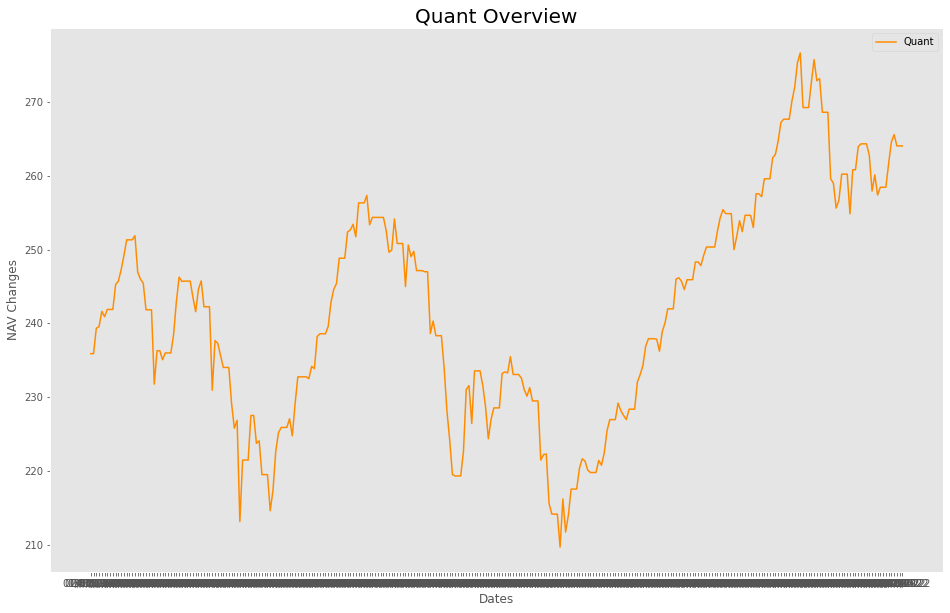

In [19]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,10)

x=quant["date"]
y=quant["net_asset_value"]
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xlabel("Dates")
plt.ylabel("NAV Changes")
plt.title('Quant Overview',fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [20]:
quant['day'].value_counts()

Saturday     43
Sunday       43
Monday       42
Tuesday      42
Thursday     42
Friday       42
Wednesday    41
Name: day, dtype: int64

#### Quant 42 Week High

In [21]:
quant.iloc[quant['net_asset_value'].idxmax()]

date                     15/09/2022
day                        Thursday
net_asset_value            276.6227
nav_change                     1.28
nav_change_in_percent          0.47
Name: 257, dtype: object

In [22]:
quant['net_asset_value'].max()

276.6227

In [23]:
date = date.today()
print("Date :",date)

Date : 2022-10-23


In [24]:
year,week_num,day_of_week = date.isocalendar()
print("Year %d, Week Number %d, Day of the Week %d" %(year,week_num,day_of_week))

Year 2022, Week Number 42, Day of the Week 7


In [25]:
print("Fact: %d Week Quant High NAV Price: %0.4f" %(week_num,quant['net_asset_value'].max()))

Fact: 42 Week Quant High NAV Price: 276.6227


#### Quant 42 Week Low

In [26]:
quant.iloc[quant['net_asset_value'].idxmin()]

date                     20/06/2022
day                          Monday
net_asset_value            209.7141
nav_change                    -4.46
nav_change_in_percent         -2.08
Name: 170, dtype: object

In [27]:
quant['net_asset_value'].min()

209.7141

In [28]:
print("Fact: %d Quant Week Low NAV Price: %0.4f" %(week_num,quant['net_asset_value'].min()))

Fact: 42 Quant Week Low NAV Price: 209.7141


#### January Summary

In [29]:
jan_quant=quant.iloc[0:31]
jan_quant.head()

date        day  net_asset_value  nav_change  nav_change_in_percent
0  01/01/2022   Saturday         235.9061        0.00                   0.00
1  02/01/2022     Sunday         235.9061        0.00                   0.00
2  03/01/2022     Monday         239.3461        3.44                   1.46
3  04/01/2022    Tuesday         239.5591        0.21                   0.09
4  05/01/2022  Wednesday         241.6364        2.08                   0.87

In [30]:
jan_quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count        31.000000   31.000000              31.000000
mean        242.001881    0.083226               0.035806
std           5.597362    2.640392               1.089231
min         231.776100  -10.070000              -4.160000
25%         236.303000    0.000000               0.000000
50%         241.843400    0.000000               0.000000
75%         245.854750    1.270000               0.510000
max         251.877100    4.530000               1.950000

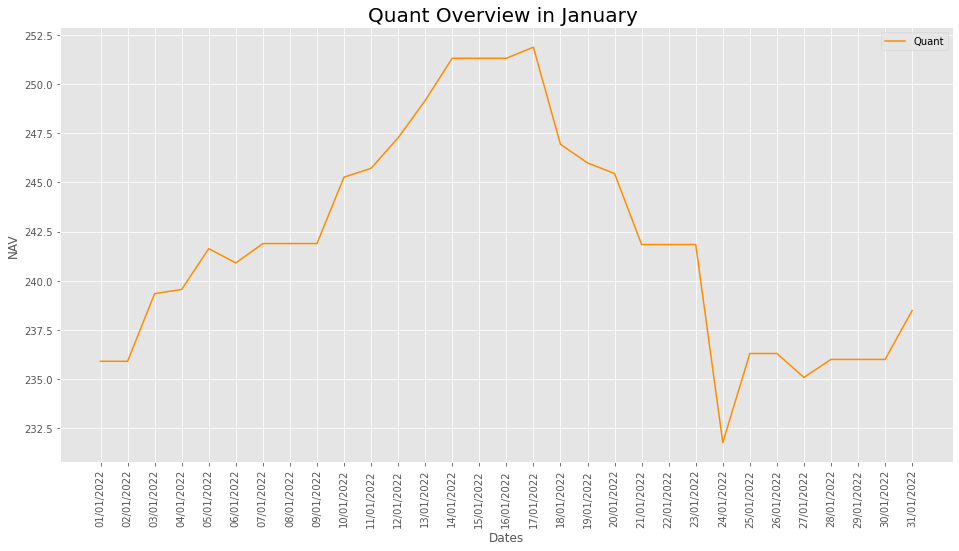

In [31]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=jan_quant["date"]
y=jan_quant["net_asset_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("NAV")
plt.title('Quant Overview in January ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

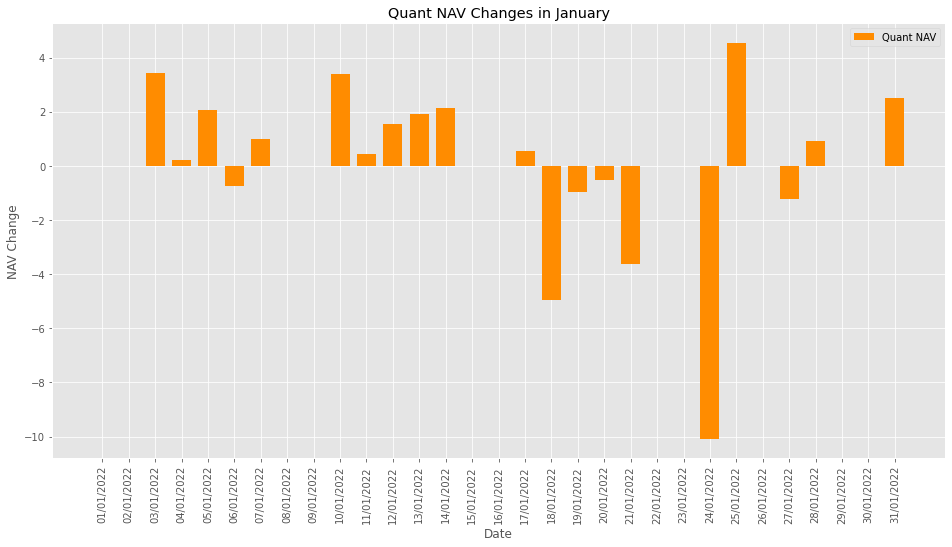

In [32]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=jan_quant["date"]
y=jan_quant["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")#royalblue

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes in January')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

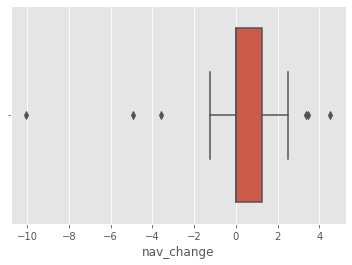

In [33]:
sns.boxplot(x=jan_quant['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

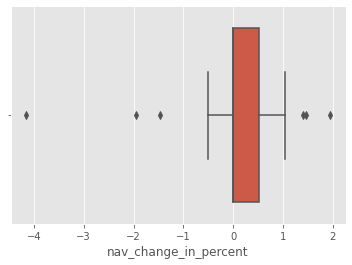

In [34]:
sns.boxplot(x=jan_quant['nav_change_in_percent'])

In [35]:
jan_quant['day'].value_counts()

Saturday     5
Sunday       5
Monday       5
Tuesday      4
Wednesday    4
Thursday     4
Friday       4
Name: day, dtype: int64

#### February Summary

In [36]:
feb_quant=quant.iloc[31:59]
feb_quant.head()

date        day  net_asset_value  nav_change  nav_change_in_percent
31  01/02/2022    Tuesday         242.9322        4.44                   1.86
32  02/02/2022  Wednesday         246.2741        3.34                   1.38
33  03/02/2022   Thursday         245.6898       -0.58                  -0.24
34  04/02/2022     Friday         245.7243        0.03                   0.01
35  05/02/2022   Saturday         245.7243        0.00                   0.00

In [37]:
feb_quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count        28.000000   28.000000              28.000000
mean        235.896711   -0.498964              -0.197500
std           9.439796    4.458347               1.935039
min         213.175000  -13.710000              -6.040000
25%         228.742000   -1.725000              -0.720000
50%         237.489650    0.000000               0.000000
75%         243.816500    1.080000               0.457500
max         246.274100    8.320000               3.900000

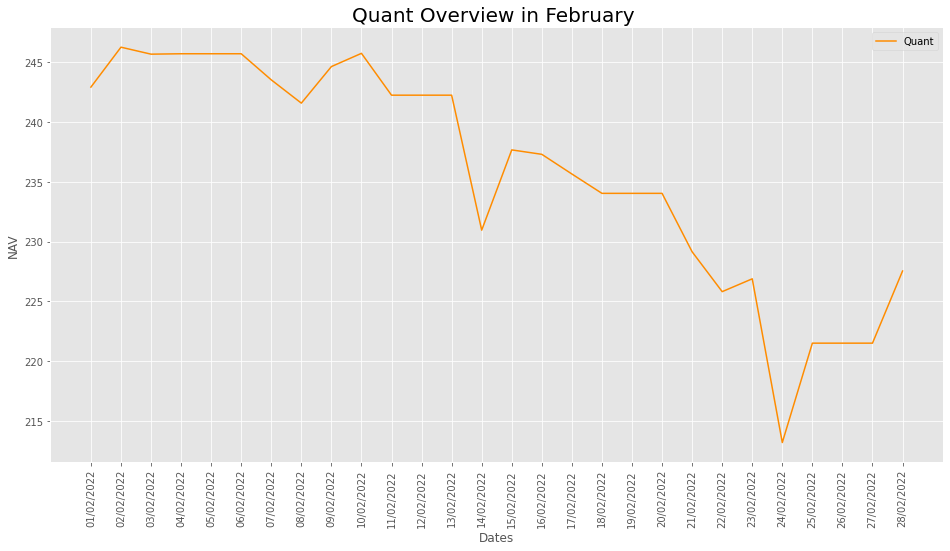

In [38]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=feb_quant["date"]
y=feb_quant["net_asset_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("NAV")
plt.title('Quant Overview in February ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

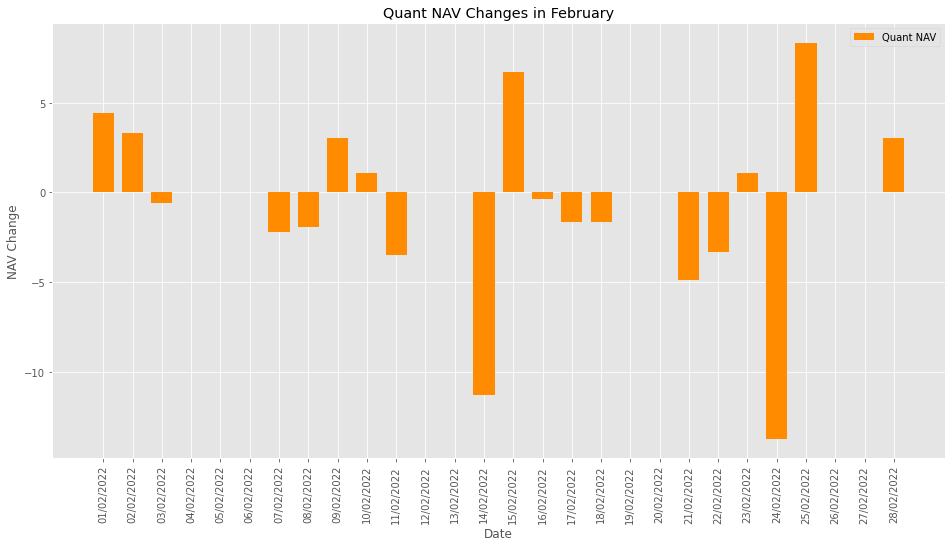

In [39]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=feb_quant["date"]
y=feb_quant["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")#royalblue

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes in February')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

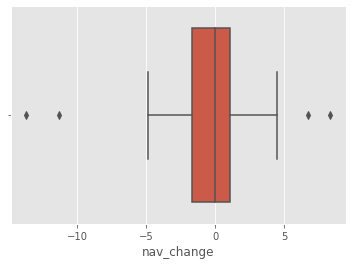

In [40]:
sns.boxplot(x=feb_quant['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

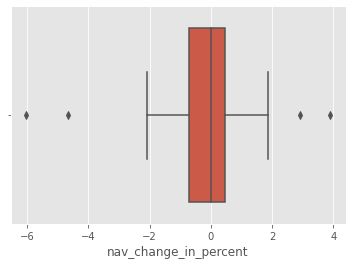

In [41]:
sns.boxplot(x=feb_quant['nav_change_in_percent'])

In [42]:
feb_quant['day'].value_counts()

Tuesday      4
Wednesday    4
Thursday     4
Friday       4
Saturday     4
Sunday       4
Monday       4
Name: day, dtype: int64

#### March Summary

In [43]:
march_quant=quant.iloc[59:90]
march_quant.head()

date        day  net_asset_value  nav_change  nav_change_in_percent
59  01/03/2022    Tuesday         227.5342        0.00                   0.00
60  02/03/2022  Wednesday         223.7724       -0.76                  -0.34
61  03/03/2022   Thursday         224.0960        0.32                   0.14
62  04/03/2022     Friday         219.5250       -4.57                  -2.04
63  05/03/2022   Saturday         219.5250        0.00                   0.00

In [44]:
march_quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count        31.000000   31.000000              31.000000
mean        230.023139    0.672903               0.291613
std           8.231740    2.235354               0.996969
min         214.638200   -4.890000              -2.230000
25%         224.434850    0.000000               0.000000
50%         229.090600    0.000000               0.000000
75%         236.199750    1.705000               0.720000
max         245.397200    5.260000               2.420000

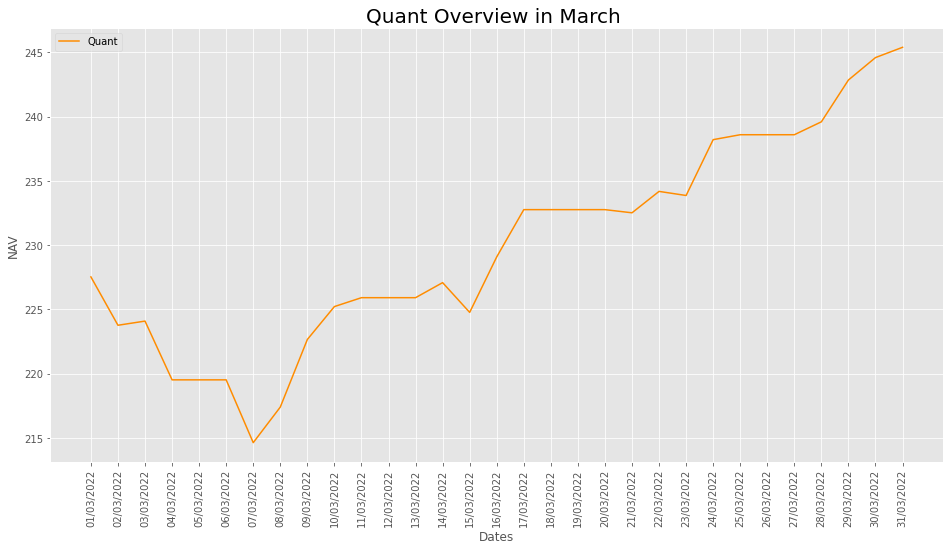

In [45]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=march_quant["date"]
y=march_quant["net_asset_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("NAV")
plt.title('Quant Overview in March ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

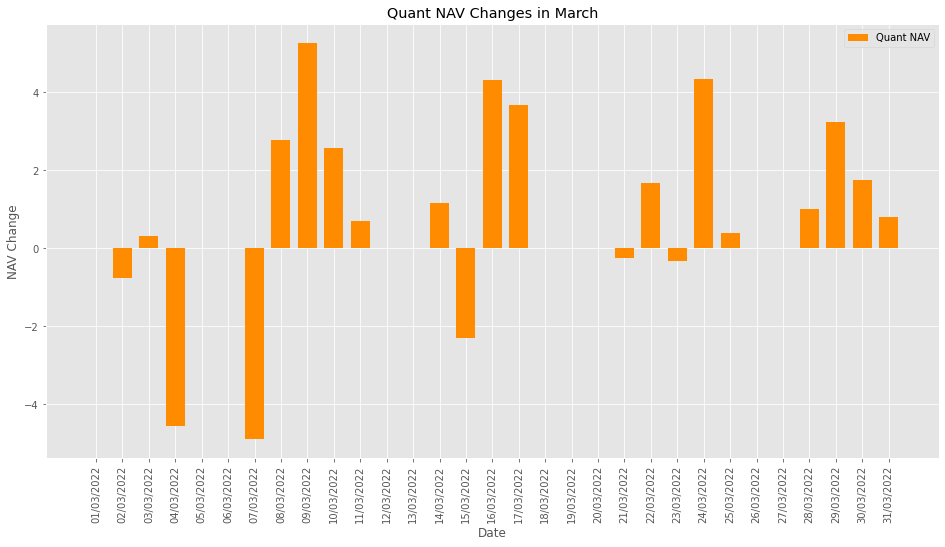

In [46]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=march_quant["date"]
y=march_quant["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes in March')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

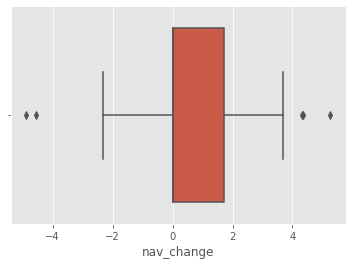

In [47]:
sns.boxplot(x=march_quant['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

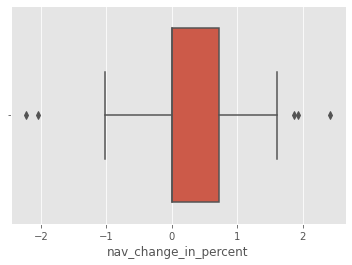

In [48]:
sns.boxplot(x=march_quant['nav_change_in_percent'])

In [49]:
march_quant['day'].value_counts()

Tuesday      5
Wednesday    5
Thursday     5
Friday       4
Saturday     4
Sunday       4
Monday       4
Name: day, dtype: int64

#### April Summary

In [50]:
april_quant=quant.iloc[90:120]
april_quant.head()

date       day  net_asset_value  nav_change  nav_change_in_percent
90  01/04/2022    Friday         248.8249        3.34                   1.40
91  02/04/2022  Saturday         248.8249        0.00                   0.00
92  03/04/2022    Sunday         248.8249        0.00                   0.00
93  04/04/2022    Monday         252.3663        3.54                   1.42
94  05/04/2022   Tuesday         252.6470        0.28                   0.11

In [51]:
april_quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count        30.000000   30.000000              30.000000
mean        251.847630    0.055333               0.029000
std           3.088755    2.505969               1.003193
min         244.992000   -5.830000              -2.320000
25%         249.670250   -1.177500              -0.472500
50%         252.047500    0.000000               0.000000
75%         254.351800    0.757500               0.305000
max         257.322400    5.620000               2.290000

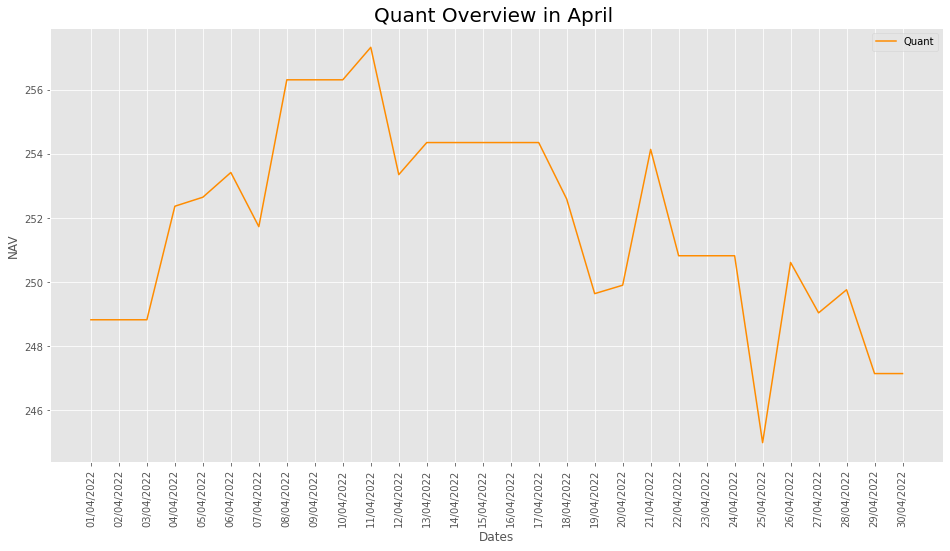

In [52]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=april_quant["date"]
y=april_quant["net_asset_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("NAV")
plt.title('Quant Overview in April ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

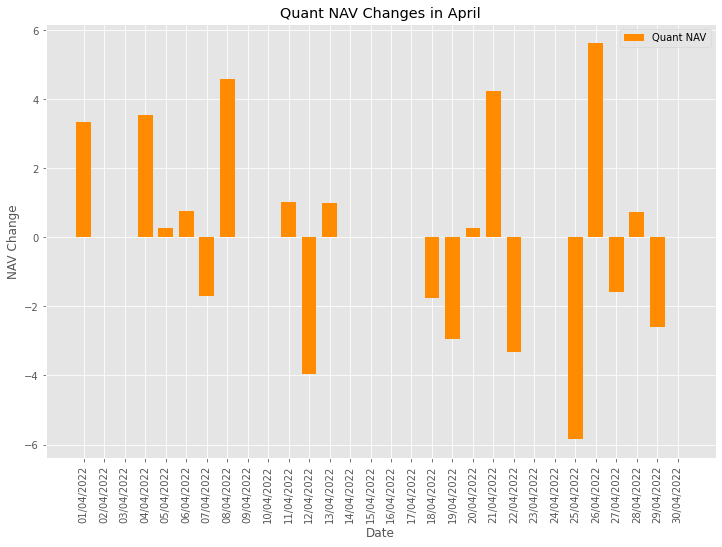

In [53]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=april_quant["date"]
y=april_quant["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes in April')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

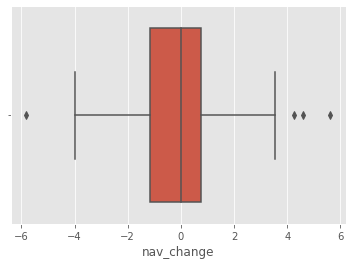

In [54]:
sns.boxplot(x=april_quant['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

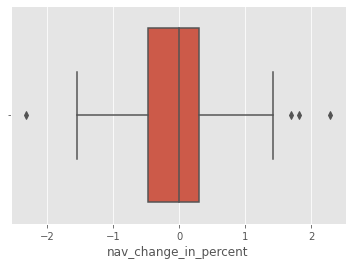

In [55]:
sns.boxplot(x=april_quant['nav_change_in_percent'])

In [56]:
april_quant['day'].value_counts()

Friday       5
Saturday     5
Sunday       4
Monday       4
Tuesday      4
Wednesday    4
Thursday     4
Name: day, dtype: int64

#### May Summary

In [57]:
may_quant=quant.iloc[120:151]
may_quant.head()

date        day  net_asset_value  nav_change  nav_change_in_percent
120  01/05/2022     Sunday         247.1468        0.00                   0.00
121  02/05/2022     Monday         246.9932       -0.15                  -0.06
122  03/05/2022    Tuesday         246.9932        0.00                   0.00
123  04/05/2022  Wednesday         238.6215       -8.37                  -3.39
124  05/05/2022   Thursday         240.3153        1.69                   0.71

In [58]:
may_quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count        31.000000   31.000000              31.000000
mean        231.469852   -0.442397              -0.171613
std           7.909922    3.566146               1.546747
min         219.346000   -8.370000              -3.390000
25%         226.734550   -2.429000              -1.045000
50%         231.581000    0.000000               0.000000
75%         236.158200    0.380000               0.165000
max         247.146800    8.350000               3.750000

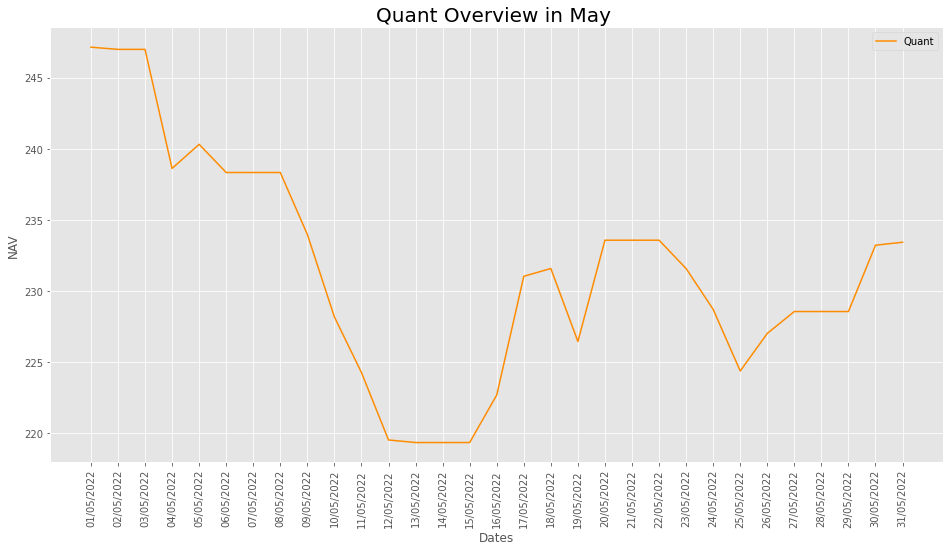

In [59]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=may_quant["date"]
y=may_quant["net_asset_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("NAV")
plt.title('Quant Overview in May ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

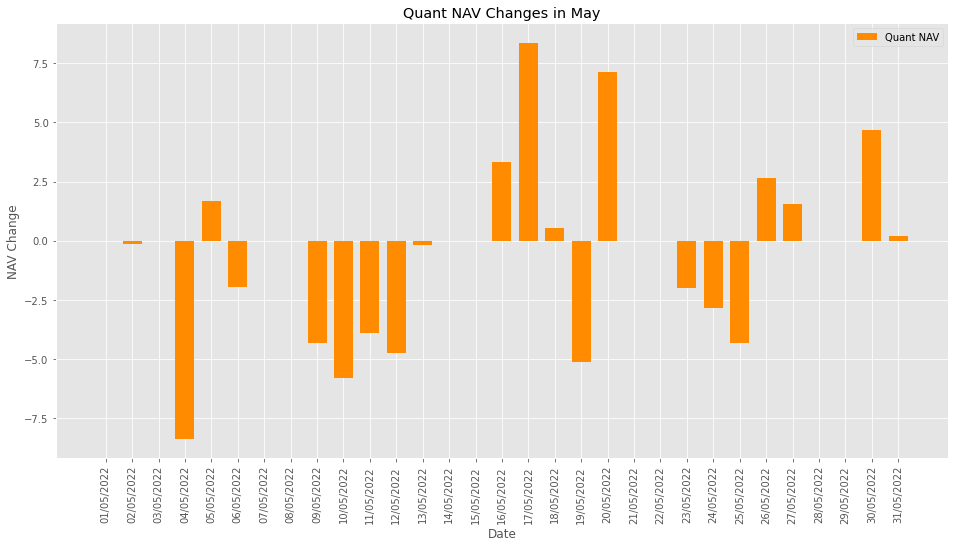

In [60]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=may_quant["date"]
y=may_quant["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes in May')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

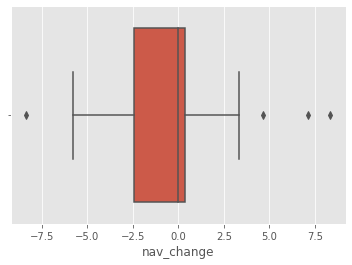

In [61]:
sns.boxplot(x=may_quant['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

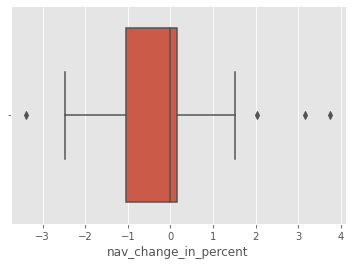

In [62]:
sns.boxplot(x=may_quant['nav_change_in_percent'])

In [63]:
may_quant['day'].value_counts()

Sunday       5
Monday       5
Tuesday      5
Wednesday    4
Thursday     4
Friday       4
Saturday     4
Name: day, dtype: int64

#### June Summary

In [64]:
june_quant=quant.iloc[151:181]
june_quant.head()

date        day  net_asset_value  nav_change  nav_change_in_percent
151  01/06/2022  Wednesday         233.3047       -0.13                  -0.05
152  02/06/2022   Thursday         235.5071        2.20                   0.94
153  03/06/2022     Friday         233.0832       -2.42                  -1.03
154  04/06/2022   Saturday         233.0832        0.00                   0.00
155  05/06/2022     Sunday         233.0832        0.00                   0.00

In [65]:
june_quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count        30.000000   30.000000              30.000000
mean        223.128780   -0.442617              -0.187000
std           7.876137    2.849622               1.295694
min         209.714100   -8.010000              -3.490000
25%         216.563825   -1.400000              -0.637500
50%         221.578000    0.000000               0.000000
75%         230.821600    0.577500               0.257500
max         235.507100    6.510000               3.110000

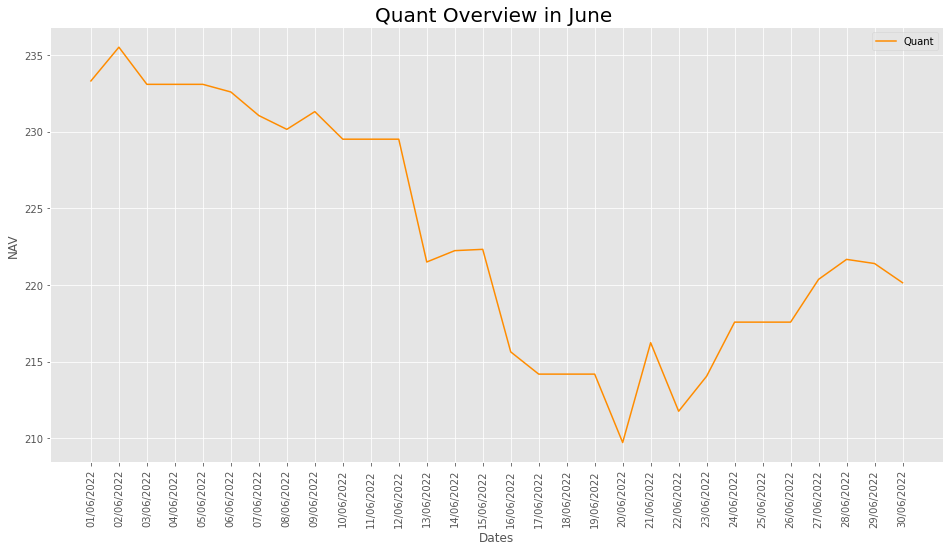

In [66]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=june_quant["date"]
y=june_quant["net_asset_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("NAV")
plt.title('Quant Overview in June ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

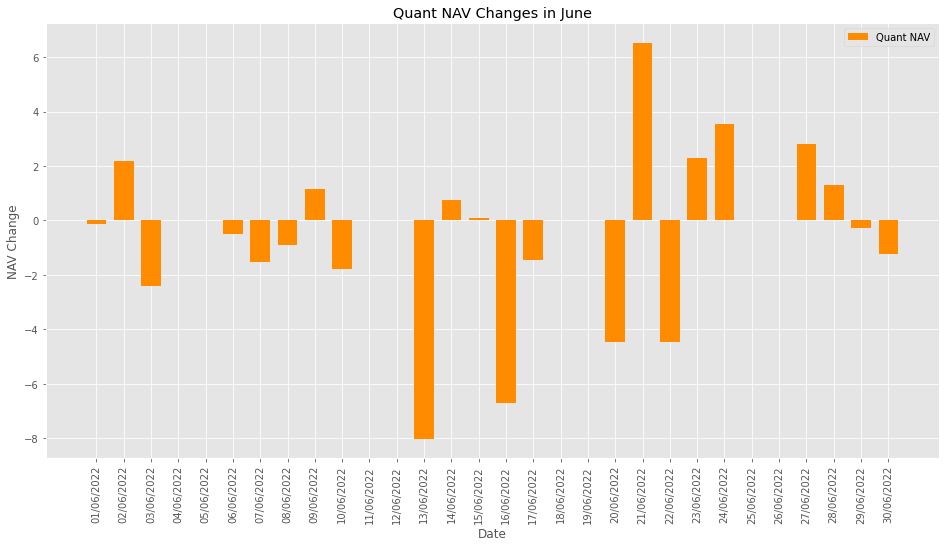

In [67]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=june_quant["date"]
y=june_quant["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes in June')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

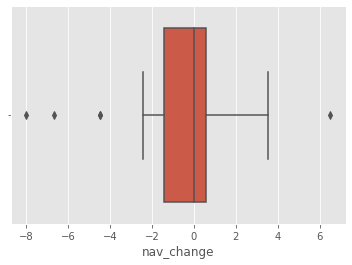

In [68]:
sns.boxplot(x=june_quant['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

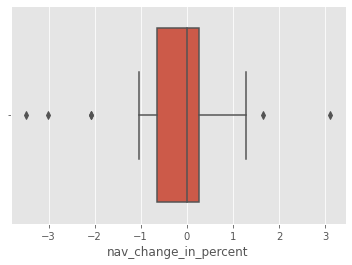

In [69]:
sns.boxplot(x=june_quant['nav_change_in_percent'])

In [70]:
june_quant['day'].value_counts()

Wednesday    5
Thursday     5
Friday       4
Saturday     4
Sunday       4
Monday       4
Tuesday      4
Name: day, dtype: int64

#### July Summary

In [71]:
july_quant=quant.iloc[181:212]
july_quant.head()

date       day  net_asset_value  nav_change  nav_change_in_percent
181  01/07/2022    Friday         219.8094       -0.33                  -0.15
182  02/07/2022  Saturday         219.8094        0.00                   0.00
183  03/07/2022    Sunday         219.8094        0.00                   0.00
184  04/07/2022    Monday         221.4457        1.64                   0.74
185  05/07/2022   Tuesday         220.7966       -0.65                  -0.29

In [72]:
july_quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count        31.000000   31.000000              31.000000
mean        230.861232    0.703577               0.307419
std           7.204223    1.279975               0.558092
min         219.809400   -1.620000              -0.680000
25%         226.974700    0.000000               0.000000
50%         228.386900    0.000000               0.000000
75%         237.893150    1.580000               0.705000
max         241.972000    3.690000               1.620000

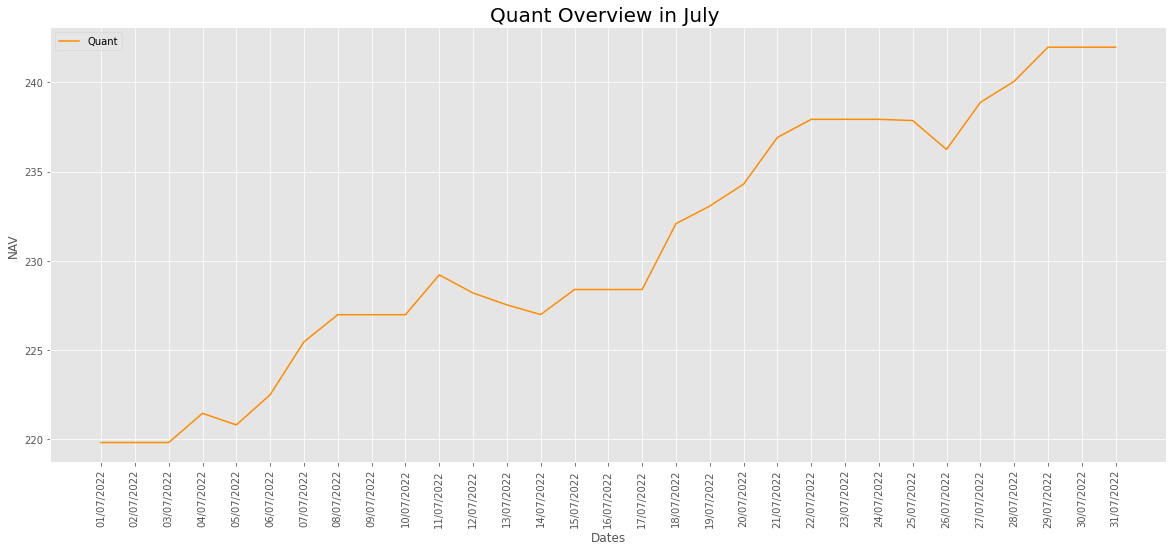

In [73]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(20,8)

x=july_quant["date"]
y=july_quant["net_asset_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("NAV")
plt.title('Quant Overview in July ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

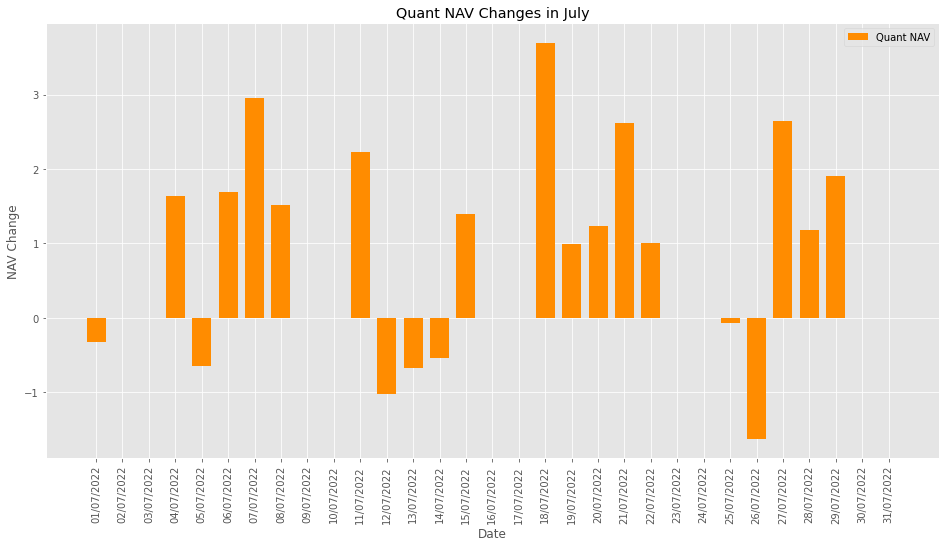

In [74]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=july_quant["date"]
y=july_quant["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes in July')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

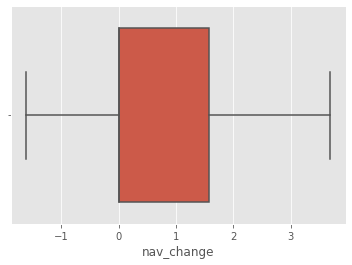

In [75]:
sns.boxplot(x=july_quant['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

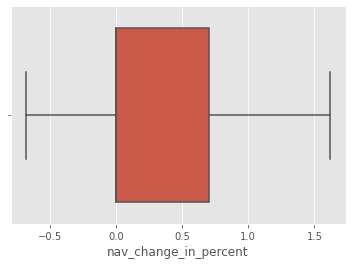

In [76]:
sns.boxplot(x=july_quant['nav_change_in_percent'])

In [77]:
july_quant['day'].value_counts()

Friday       5
Saturday     5
Sunday       5
Monday       4
Tuesday      4
Wednesday    4
Thursday     4
Name: day, dtype: int64

#### August Summary

In [78]:
aug_quant=quant.iloc[212:243]
aug_quant.head()

date        day  net_asset_value  nav_change  nav_change_in_percent
212  01/08/2022     Monday         245.9974        4.03                   1.66
213  02/08/2022    Tuesday         246.1856        0.19                   0.08
214  03/08/2022  Wednesday         245.6873       -0.50                  -0.20
215  04/08/2022   Thursday         244.5831       -1.10                  -0.45
216  05/08/2022     Friday         245.9172        1.33                   0.55

In [79]:
aug_quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count        31.000000   31.000000              31.000000
mean        251.036119    0.502903               0.204194
std           3.844069    1.756212               0.699494
min         244.583100   -4.880000              -1.910000
25%         248.071150    0.000000               0.000000
50%         250.339900    0.000000               0.000000
75%         254.635500    1.585000               0.630000
max         257.546100    4.570000               1.810000

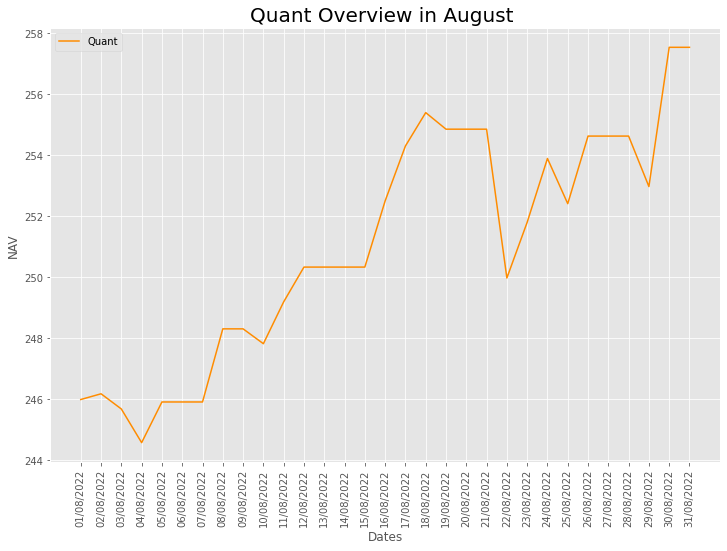

In [80]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=aug_quant["date"]
y=aug_quant["net_asset_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("NAV")
plt.title('Quant Overview in August ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

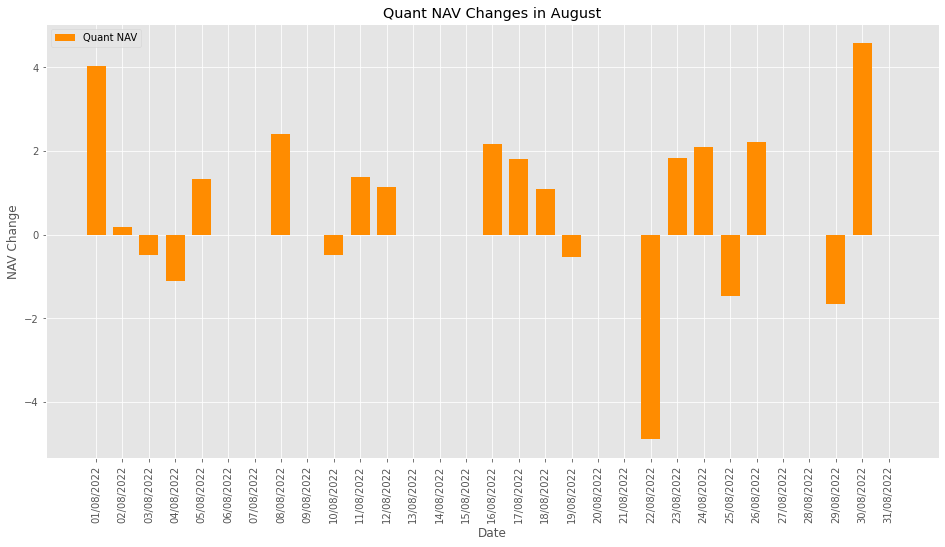

In [81]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=aug_quant["date"]
y=aug_quant["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes in August')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

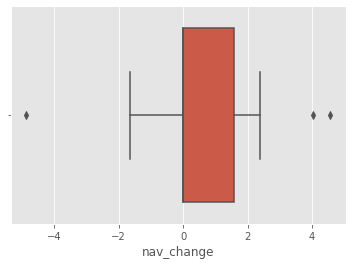

In [82]:
sns.boxplot(x=aug_quant['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

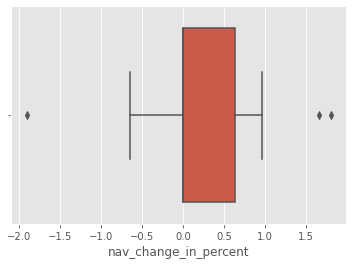

In [83]:
sns.boxplot(x=aug_quant['nav_change_in_percent'])

In [84]:
aug_quant['day'].value_counts()

Monday       5
Tuesday      5
Wednesday    5
Thursday     4
Friday       4
Saturday     4
Sunday       4
Name: day, dtype: int64

#### September Summary

In [85]:
sept_quant=quant.iloc[243:273]
sept_quant.head()

date       day  net_asset_value  nav_change  nav_change_in_percent
243  01/09/2022  Thursday         257.1700     -0.3761                  -0.15
244  02/09/2022    Friday         259.5800      2.4100                   0.94
245  03/09/2022  Saturday         259.5800      0.0000                   0.00
246  04/09/2022    Sunday         259.5800      0.0000                   0.00
247  05/09/2022    Monday         262.4163      2.8400                   1.09

In [86]:
sept_quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count        30.000000   30.000000              30.000000
mean        266.301423    0.089463               0.040667
std           6.136822    2.978661               1.106217
min         255.610100   -8.990000              -3.350000
25%         259.748275    0.000000               0.000000
50%         267.651200    0.150000               0.055000
75%         269.915250    2.277500               0.872500
max         276.622700    3.530000               1.380000

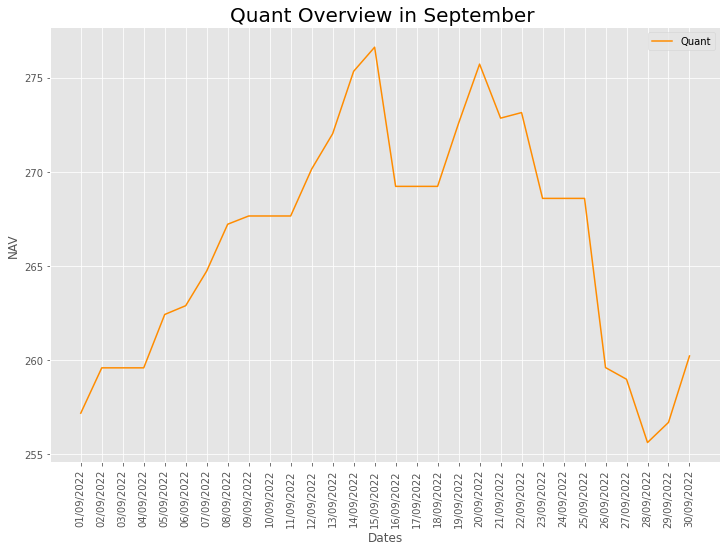

In [87]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=sept_quant["date"]
y=sept_quant["net_asset_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("NAV")
plt.title('Quant Overview in September ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

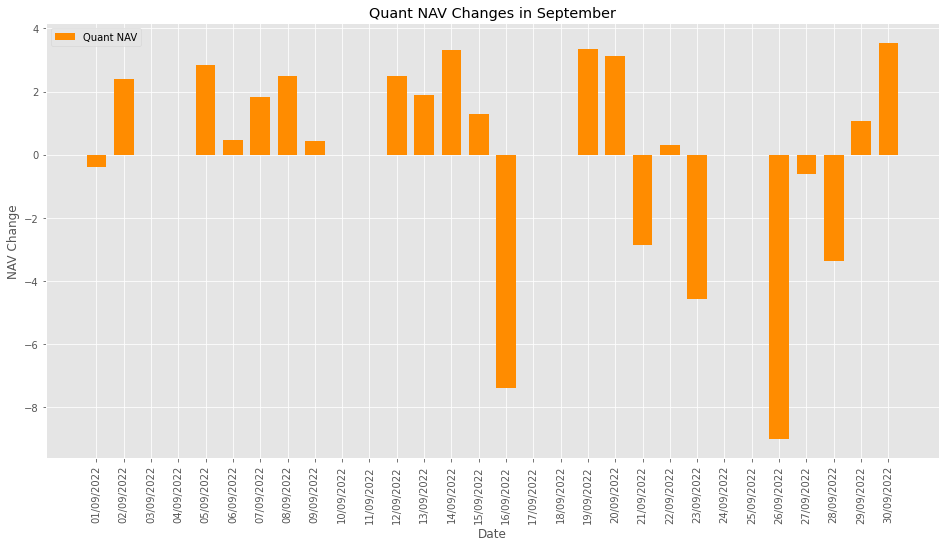

In [88]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=sept_quant["date"]
y=sept_quant["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes in September')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

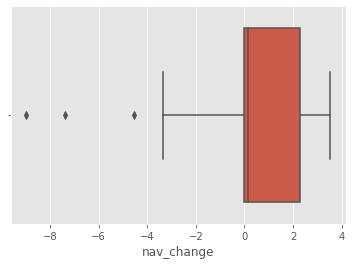

In [89]:
sns.boxplot(x=sept_quant['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

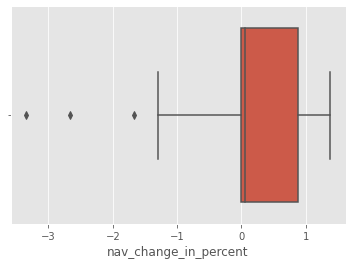

In [90]:
sns.boxplot(x=sept_quant['nav_change_in_percent'])

In [91]:
sept_quant['day'].value_counts()

Thursday     5
Friday       5
Saturday     4
Sunday       4
Monday       4
Tuesday      4
Wednesday    4
Name: day, dtype: int64

#### October Summary

In [92]:
oct_quant=quant.iloc[273:]
oct_quant.head()

date        day  net_asset_value  nav_change  nav_change_in_percent
273  01/10/2022   Saturday         260.2114        0.00                   0.00
274  02/10/2022     Sunday         260.2114        0.00                   0.00
275  03/10/2022     Monday         254.8392       -5.37                  -2.06
276  04/10/2022    Tuesday         260.8041        5.96                   2.34
277  05/10/2022  Wednesday         260.8041        0.00                   0.00

In [93]:
oct_quant.describe()

net_asset_value  nav_change  nav_change_in_percent
count        22.000000   22.000000              22.000000
mean        261.410755    0.199545               0.080455
std           2.965684    2.546500               0.981420
min         254.839200   -5.370000              -2.060000
25%         258.851275    0.000000               0.000000
50%         261.213300    0.000000               0.000000
75%         264.028800    1.447500               0.552500
max         265.566500    5.960000               2.340000

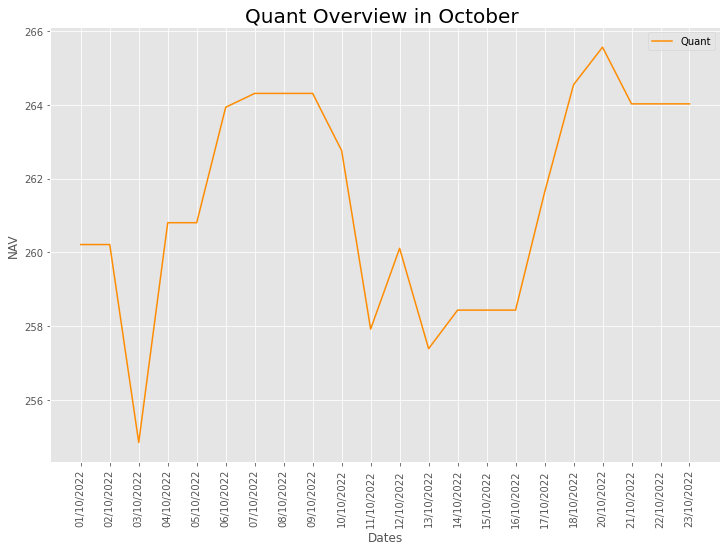

In [94]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=oct_quant["date"]
y=oct_quant["net_asset_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='darkorange',linestyle='solid',label="Quant")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("NAV")
plt.title('Quant Overview in October ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

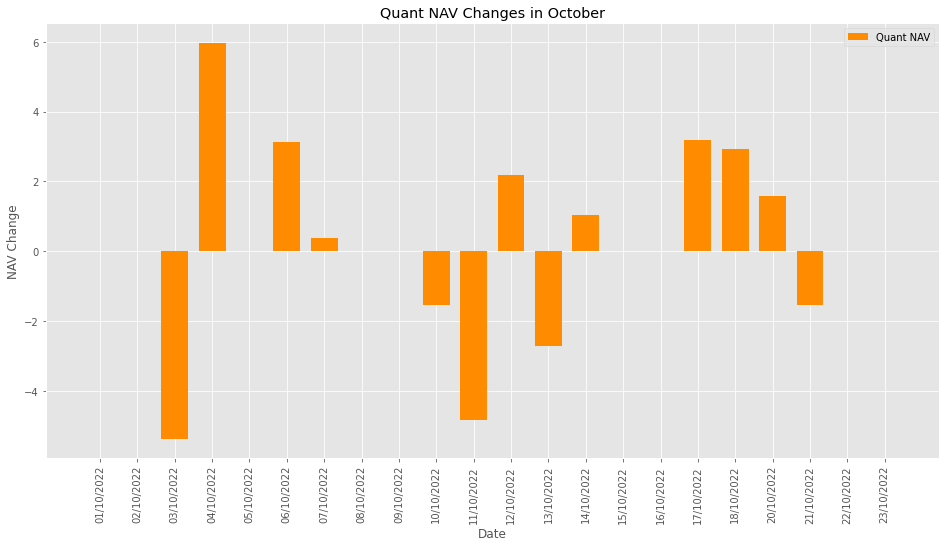

In [95]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=oct_quant["date"]
y=oct_quant["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes in October')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

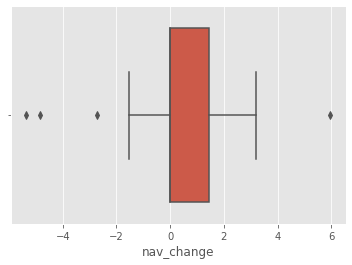

In [96]:
sns.boxplot(x=oct_quant['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

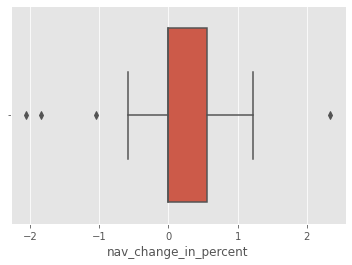

In [97]:
sns.boxplot(x=oct_quant['nav_change_in_percent'])

In [98]:
oct_quant['day'].value_counts()

Saturday     4
Sunday       4
Monday       3
Tuesday      3
Thursday     3
Friday       3
Wednesday    2
Name: day, dtype: int64

#### Trading Days (Stock Market working days)

In [99]:
quant_working = quant[(quant['nav_change']!=0)]
quant_working

date        day  net_asset_value  nav_change  nav_change_in_percent
2    03/01/2022     Monday         239.3461      3.4400                   1.46
3    04/01/2022    Tuesday         239.5591      0.2100                   0.09
4    05/01/2022  Wednesday         241.6364      2.0800                   0.87
5    06/01/2022   Thursday         240.9074     -0.7300                  -0.30
6    07/01/2022     Friday         241.8924      0.9900                   0.24
9    10/01/2022     Monday         245.2700      3.3800                   1.40
10   11/01/2022    Tuesday         245.7173      0.4500                   0.18
11   12/01/2022  Wednesday         247.2710      1.5500                   0.63
12   13/01/2022   Thursday         249.1660      1.9000                   0.77
13   14/01/2022     Friday         251.3135      2.1500                   0.86
16   17/01/2022     Monday         251.8771      0.5600                   0.22
17   18/01/2022    Tuesday         246.9406     -4.9400                  -1.96
18   19/01/2022  Wednesday         245.9922     -0.9500                  -0.38
19   20/01/2022   Thursday         245.4532     -0.5400                  -0.22
20   21/01/2022     Friday         241.8434     -3.6100                  -1.47
23   24/01/2022     Monday         231.7761    -10.0700                  -4.16
24   25/01/2022    Tuesday         236.3030      4.5300                   1.95
26   27/01/2022   Thursday         235.0874     -1.2200                  -0.51
27   28/01/2022     Friday         236.0013      0.9100                   0.39
30   31/01/2022     Monday         238.4884      2.4900                   1.05
31   01/02/2022    Tuesday         242.9322      4.4400                   1.86
32   02/02/2022  Wednesday         246.2741      3.3400                   1.38
33   03/02/2022   Thursday         245.6898     -0.5800                  -0.24
34   04/02/2022     Friday         245.7243      0.0300                   0.01
37   07/02/2022     Monday         243.5384     -2.1900                  -0.89
38   08/02/2022    Tuesday         241.5908     -1.9500                  -0.81
39   09/02/2022  Wednesday         244.6508      3.0600                   1.27
40   10/02/2022   Thursday         245.7589      1.1100                   0.45
41   11/02/2022     Friday         242.2560     -3.5000                  -1.43
44   14/02/2022     Monday         230.9550    -11.3010                  -4.66
45   15/02/2022    Tuesday         237.6750      6.7200                   2.91
46   16/02/2022  Wednesday         237.3043     -0.3700                  -0.16
47   17/02/2022   Thursday         235.6578     -1.6500                  -0.69
48   18/02/2022     Friday         234.0374     -1.6200                  -0.69
51   21/02/2022     Monday         229.1446     -4.8900                  -2.09
52   22/02/2022    Tuesday         225.8079     -3.3400                  -1.46
53   23/02/2022  Wednesday         226.8813      1.0700                   0.48
54   24/02/2022   Thursday         213.1750    -13.7100                  -6.04
55   25/02/2022     Friday         221.4949      8.3200                   3.90
58   28/02/2022     Monday         227.5342      3.0400                   1.37
60   02/03/2022  Wednesday         223.7724     -0.7600                  -0.34
61   03/03/2022   Thursday         224.0960      0.3200                   0.14
62   04/03/2022     Friday         219.5250     -4.5700                  -2.04
65   07/03/2022     Monday         214.6382     -4.8900                  -2.23
66   08/03/2022    Tuesday         217.4073      2.7700                   1.29
67   09/03/2022  Wednesday         222.6650      5.2600                   2.42
68   10/03/2022   Thursday         225.2258      2.5600                   1.15
69   11/03/2022     Friday         225.9176      0.6900                   0.31
72   14/03/2022     Monday         227.0886      1.1700                   0.52
73   15/03/2022    Tuesday         224.7737     -2.3100      

In [100]:
quant_working.shape

(199, 5)

In [101]:
quant_working.count()
#quant_working.duplicated()

date                     199
day                      199
net_asset_value          199
nav_change               199
nav_change_in_percent    199
dtype: int64

In [102]:
quant_working.describe()

net_asset_value  nav_change  nav_change_in_percent
count       199.000000  199.000000             199.000000
mean        241.451621    0.143774               0.067387
std          15.342528    3.395974               1.430471
min         209.714100  -13.710000              -6.040000
25%         229.117600   -1.560000              -0.655000
50%         241.590800    0.690000               0.240000
75%         252.549200    2.260000               0.940000
max         276.622700    8.350000               3.900000

<AxesSubplot:xlabel='nav_change'>

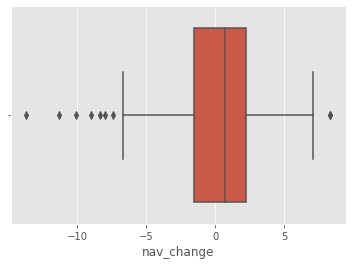

In [103]:
sns.boxplot(x=quant_working['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

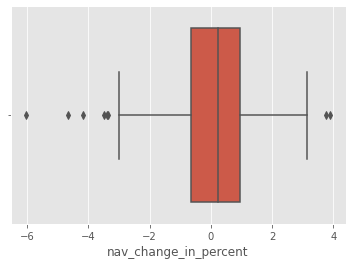

In [104]:
sns.boxplot(x=quant_working['nav_change_in_percent'])

In [105]:
quant_working['day'].value_counts()

Monday       41
Thursday     41
Friday       40
Tuesday      39
Wednesday    38
Name: day, dtype: int64

#### Positive NAV Changes

In [106]:
quant_plus=quant[(quant['nav_change']>0)]

In [107]:
quant_plus.head()

date        day  net_asset_value  nav_change  nav_change_in_percent
2  03/01/2022     Monday         239.3461        3.44                   1.46
3  04/01/2022    Tuesday         239.5591        0.21                   0.09
4  05/01/2022  Wednesday         241.6364        2.08                   0.87
6  07/01/2022     Friday         241.8924        0.99                   0.24
9  10/01/2022     Monday         245.2700        3.38                   1.40

In [108]:
quant_plus.shape

(116, 5)

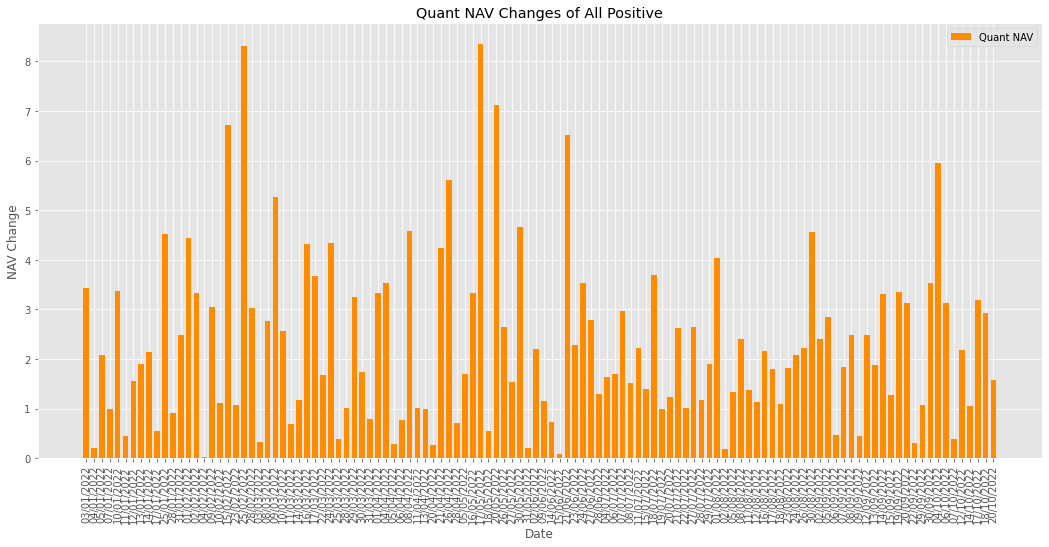

In [109]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(18,8)

x=quant_plus["date"]
y=quant_plus["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Quant NAV")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes of All Positive')
plt.legend()
plt.show()

In [110]:
quant_plus.count()

date                     116
day                      116
net_asset_value          116
nav_change               116
nav_change_in_percent    116
dtype: int64

In [111]:
quant_plus.describe()

net_asset_value  nav_change  nav_change_in_percent
count       116.000000  116.000000             116.000000
mean        243.829949    2.327672               0.978448
std          15.310065    1.721185               0.760721
min         214.041400    0.030000               0.010000
25%         231.956375    1.065000               0.427500
50%         244.624550    1.995000               0.815000
75%         254.320450    3.267500               1.337500
max         276.622700    8.350000               3.900000

<AxesSubplot:xlabel='nav_change'>

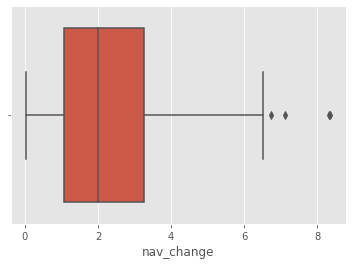

In [112]:
sns.boxplot(x=quant_plus['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

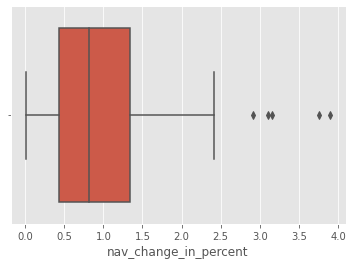

In [113]:
sns.boxplot(x=quant_plus['nav_change_in_percent'])

In [114]:
quant_plus['day'].value_counts()

Tuesday      25
Thursday     25
Friday       24
Monday       21
Wednesday    21
Name: day, dtype: int64

In [ ]:
plus_a=0
plus_b=0
plus_c=0
plus_d=0

for i in quant_plus.index:
    
    if ((quant_plus.nav_change[i] > 0) & (quant_plus.nav_change[i] <= 1.5)):
        plus_a=plus_d+1
        
    elif ((quant_plus.nav_change[i] > 1.5) & (quant_plus.nav_change[i] <= 3)):
        plus_b=plus_c+1
        
    elif ((quant_plus.nav_change[i] > 3) & (quant_plus.nav_change[i] <= 4.5)):
        plus_b=plus_b+1
    
    else:
        plus_b=plus_a+1

#### Negative NAV Changes

In [115]:
quant_minus=quant[(quant['nav_change']<0)]

In [116]:
quant_minus.head()

date        day  net_asset_value  nav_change  nav_change_in_percent
5   06/01/2022   Thursday         240.9074       -0.73                  -0.30
17  18/01/2022    Tuesday         246.9406       -4.94                  -1.96
18  19/01/2022  Wednesday         245.9922       -0.95                  -0.38
19  20/01/2022   Thursday         245.4532       -0.54                  -0.22
20  21/01/2022     Friday         241.8434       -3.61                  -1.47

In [117]:
quant_minus.count()

date                     83
day                      83
net_asset_value          83
nav_change               83
nav_change_in_percent    83
dtype: int64

In [118]:
quant_minus.describe()

net_asset_value  nav_change  nav_change_in_percent
count        83.000000   83.000000              83.000000
mean        238.127692   -2.908422              -1.205904
std          14.848378    2.741518               1.146349
min         209.714100  -13.710000              -6.040000
25%         227.255150   -4.465000              -1.870000
50%         236.238600   -1.950000              -0.810000
75%         249.340050   -0.745000              -0.320000
max         272.851400   -0.069100              -0.030000

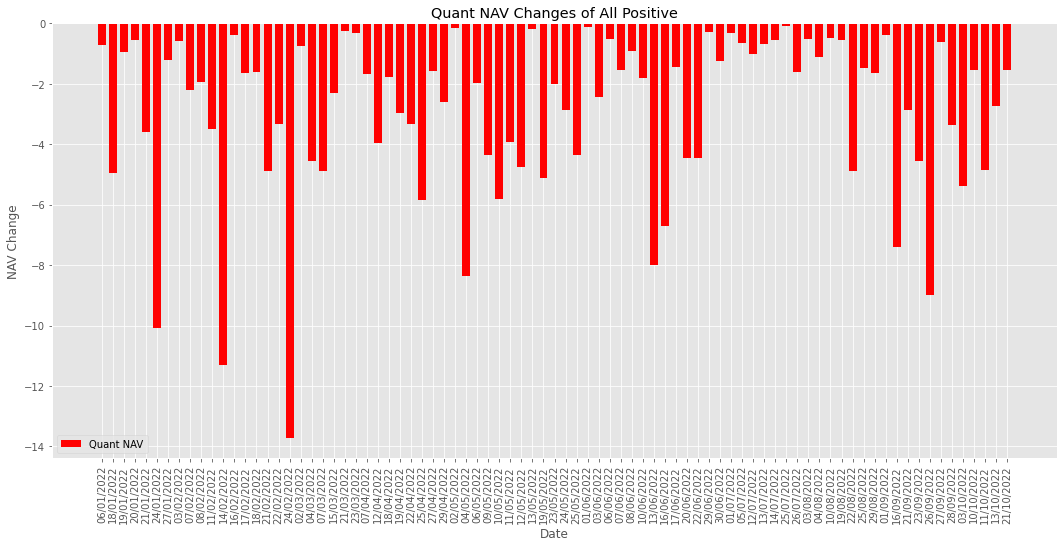

In [119]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(18,8)

x=quant_minus["date"]
y=quant_minus["nav_change"]
plt.bar(x,y,color='red',width=0.72,label="Quant NAV")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Change")
plt.title('Quant NAV Changes of All Positive')
plt.legend()
plt.show()

<AxesSubplot:xlabel='nav_change'>

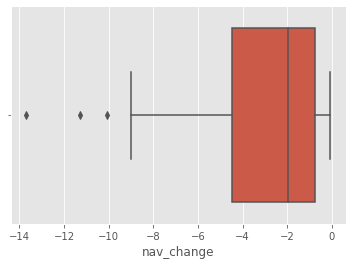

In [120]:
sns.boxplot(x=quant_minus['nav_change'])

<AxesSubplot:xlabel='nav_change_in_percent'>

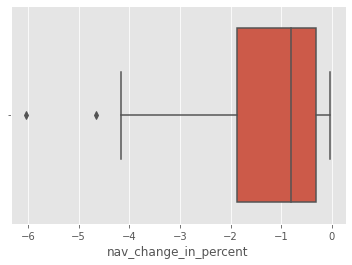

In [121]:
sns.boxplot(x=quant_minus['nav_change_in_percent'])

In [122]:
quant_minus['day'].value_counts()

Monday       20
Wednesday    17
Thursday     16
Friday       16
Tuesday      14
Name: day, dtype: int64

#### Neutral Market (Stock Market Holidays)

In [123]:
quant_neutral = quant[(quant['nav_change']==0)]

In [124]:
quant_neutral.head()

date       day  net_asset_value  nav_change  nav_change_in_percent
0   01/01/2022  Saturday         235.9061         0.0                    0.0
1   02/01/2022    Sunday         235.9061         0.0                    0.0
7   08/01/2022  Saturday         241.8924         0.0                    0.0
8   09/01/2022    Sunday         241.8924         0.0                    0.0
14  15/01/2022  Saturday         251.3135         0.0                    0.0

In [125]:
quant_neutral.shape

(96, 5)

In [126]:
quant_neutral.count()

date                     96
day                      96
net_asset_value          96
nav_change               96
nav_change_in_percent    96
dtype: int64

In [127]:
quant_neutral['day'].value_counts()

Saturday     43
Sunday       43
Wednesday     3
Tuesday       3
Friday        2
Thursday      1
Monday        1
Name: day, dtype: int64

In [128]:
import plotly.graph_objects as go

labels = ['Nava Services','Trading','Positive','Negative','Neutral']
values = [quant.day.count(),quant_working.day.count(),quant_plus.day.count(),quant_minus.day.count(),quant_neutral.day.count()]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=values,
    width=[0.7, 0.7, 0.7, 0.7, 0.7], # customize width here
    name='Primary Product',
    marker_color='darkorange'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Quant performance 2022')
fig.show()

### Day-Wise Stats
#### Saturday 

In [129]:
saturday=quant[quant.day=='Saturday']
saturday.head()

date       day  net_asset_value  nav_change  nav_change_in_percent
0   01/01/2022  Saturday         235.9061         0.0                    0.0
7   08/01/2022  Saturday         241.8924         0.0                    0.0
14  15/01/2022  Saturday         251.3135         0.0                    0.0
21  22/01/2022  Saturday         241.8434         0.0                    0.0
28  29/01/2022  Saturday         236.0013         0.0                    0.0

In [130]:
saturday.shape

(43, 5)

In [131]:
saturday.count()

date                     43
day                      43
net_asset_value          43
nav_change               43
nav_change_in_percent    43
dtype: int64

In [132]:
saturday.describe()

net_asset_value  nav_change  nav_change_in_percent
count        43.000000        43.0                   43.0
mean        242.133251         0.0                    0.0
std          15.228850         0.0                    0.0
min         214.177500         0.0                    0.0
25%         231.136050         0.0                    0.0
50%         241.892400         0.0                    0.0
75%         254.493650         0.0                    0.0
max         269.225100         0.0                    0.0

#### Sunday

In [133]:
sunday=quant[quant.day=='Sunday']
sunday.head()

date     day  net_asset_value  nav_change  nav_change_in_percent
1   02/01/2022  Sunday         235.9061         0.0                    0.0
8   09/01/2022  Sunday         241.8924         0.0                    0.0
15  16/01/2022  Sunday         251.3135         0.0                    0.0
22  23/01/2022  Sunday         241.8434         0.0                    0.0
29  30/01/2022  Sunday         236.0013         0.0                    0.0

In [134]:
sunday.shape

(43, 5)

In [135]:
sunday.count()

date                     43
day                      43
net_asset_value          43
nav_change               43
nav_change_in_percent    43
dtype: int64

In [136]:
sunday.describe()

net_asset_value  nav_change  nav_change_in_percent
count        43.000000        43.0                   43.0
mean        242.133251         0.0                    0.0
std          15.228850         0.0                    0.0
min         214.177500         0.0                    0.0
25%         231.136050         0.0                    0.0
50%         241.892400         0.0                    0.0
75%         254.493650         0.0                    0.0
max         269.225100         0.0                    0.0

#### Monday

In [137]:
monday=quant_working[quant_working.day=='Monday']
monday.head()

date     day  net_asset_value  nav_change  nav_change_in_percent
2   03/01/2022  Monday         239.3461        3.44                   1.46
9   10/01/2022  Monday         245.2700        3.38                   1.40
16  17/01/2022  Monday         251.8771        0.56                   0.22
23  24/01/2022  Monday         231.7761      -10.07                  -4.16
30  31/01/2022  Monday         238.4884        2.49                   1.05

In [138]:
monday.shape

(41, 5)

In [139]:
monday.count()

date                     41
day                      41
net_asset_value          41
nav_change               41
nav_change_in_percent    41
dtype: int64

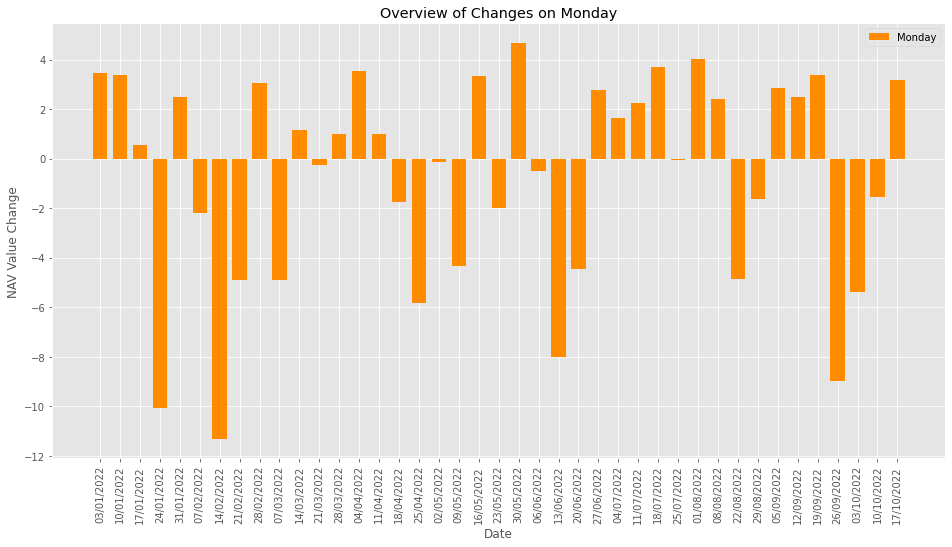

In [140]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=monday["date"]
y=monday["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Monday")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Value Change")
plt.title('Overview of Changes on Monday')
plt.legend()
plt.show()

In [141]:
monday.describe()

net_asset_value  nav_change  nav_change_in_percent
count        41.000000   41.000000              41.000000
mean        240.816798   -0.654880              -0.260732
std          15.205107    4.247739               1.757550
min         209.714100  -11.301000              -4.660000
25%         230.955000   -4.350000              -1.830000
50%         239.346100    0.560000               0.220000
75%         252.366300    2.840000               1.230000
max         272.581400    4.660000               2.040000

In [142]:
mon=round(monday[('nav_change_in_percent')].mean(), 2)
mon

-0.26

#### Tuesday

In [143]:
tuesday=quant_working[quant_working.day=='Tuesday']
tuesday.head()

date      day  net_asset_value  nav_change  nav_change_in_percent
3   04/01/2022  Tuesday         239.5591        0.21                   0.09
10  11/01/2022  Tuesday         245.7173        0.45                   0.18
17  18/01/2022  Tuesday         246.9406       -4.94                  -1.96
24  25/01/2022  Tuesday         236.3030        4.53                   1.95
31  01/02/2022  Tuesday         242.9322        4.44                   1.86

In [144]:
tuesday.shape

(39, 5)

In [145]:
tuesday.count()

date                     39
day                      39
net_asset_value          39
nav_change               39
nav_change_in_percent    39
dtype: int64

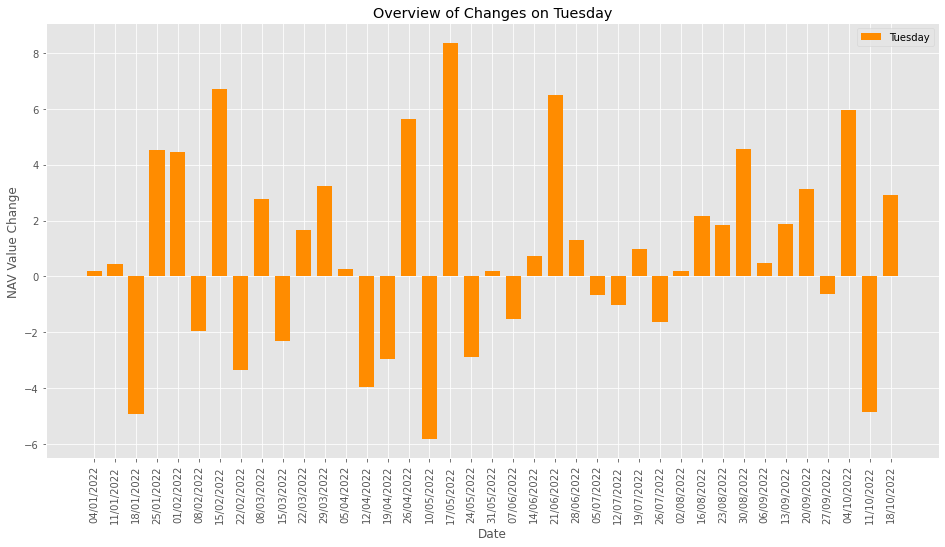

In [146]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=tuesday["date"]
y=tuesday["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Tuesday")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Value Change")
plt.title('Overview of Changes on Tuesday')
plt.legend()
plt.show()

In [147]:
tuesday.describe()

net_asset_value  nav_change  nav_change_in_percent
count        39.000000   39.000000              39.000000
mean        241.890854    0.840013               0.364103
std          15.341056    3.457249               1.461156
min         216.228700   -5.803000              -2.480000
25%         229.874300   -1.579250              -0.670000
50%         241.590800    0.470000               0.180000
75%         252.577750    3.035000               1.220000
max         275.723000    8.350000               3.750000

In [148]:
tue=round(tuesday[('nav_change_in_percent')].mean(), 2)
tue

0.36

#### Wednesday

In [149]:
wednesday=quant_working[quant_working.day=='Wednesday']
wednesday.head()

date        day  net_asset_value  nav_change  nav_change_in_percent
4   05/01/2022  Wednesday         241.6364        2.08                   0.87
11  12/01/2022  Wednesday         247.2710        1.55                   0.63
18  19/01/2022  Wednesday         245.9922       -0.95                  -0.38
32  02/02/2022  Wednesday         246.2741        3.34                   1.38
39  09/02/2022  Wednesday         244.6508        3.06                   1.27

In [150]:
wednesday.shape

(38, 5)

In [151]:
wednesday.count()

date                     38
day                      38
net_asset_value          38
nav_change               38
nav_change_in_percent    38
dtype: int64

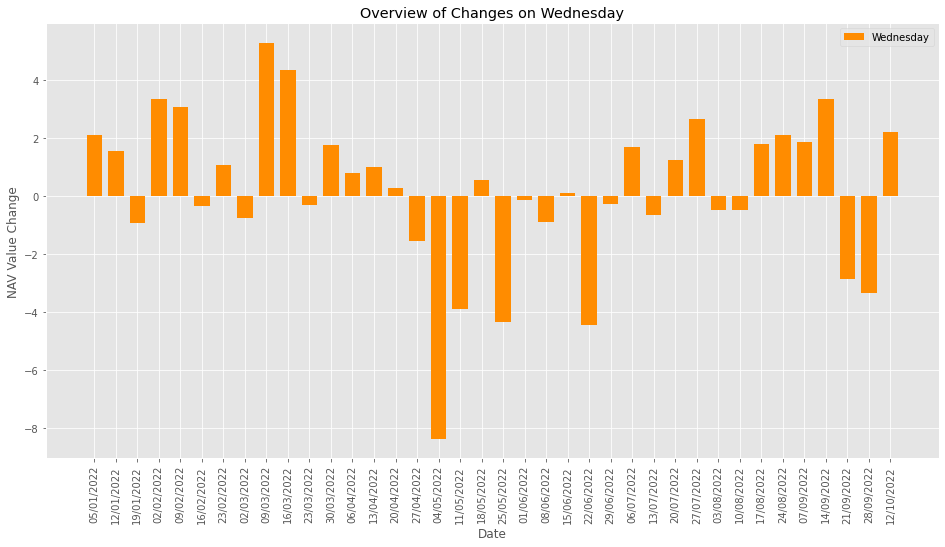

In [152]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=wednesday["date"]
y=wednesday["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Wednesday")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Value Change")
plt.title('Overview of Changes on Wednesday')
plt.legend()
plt.show()

In [153]:
wednesday.describe()

net_asset_value  nav_change  nav_change_in_percent
count        38.000000   38.000000              38.000000
mean        240.580005    0.201053               0.084474
std          15.035591    2.681506               1.128967
min         211.754200   -8.370000              -3.390000
25%         227.917750   -0.737500              -0.327500
50%         240.255800    0.405000               0.175000
75%         249.686700    1.830000               0.757500
max         275.341300    5.260000               2.420000

In [154]:
wed=round(wednesday[('nav_change_in_percent')].mean(), 2)
wed

0.08

#### Thursday

In [155]:
thursday=quant_working[quant_working.day=='Thursday']
thursday.head()

date       day  net_asset_value  nav_change  nav_change_in_percent
5   06/01/2022  Thursday         240.9074       -0.73                  -0.30
12  13/01/2022  Thursday         249.1660        1.90                   0.77
19  20/01/2022  Thursday         245.4532       -0.54                  -0.22
26  27/01/2022  Thursday         235.0874       -1.22                  -0.51
33  03/02/2022  Thursday         245.6898       -0.58                  -0.24

In [156]:
thursday.shape

(41, 5)

In [157]:
thursday.count()

date                     41
day                      41
net_asset_value          41
nav_change               41
nav_change_in_percent    41
dtype: int64

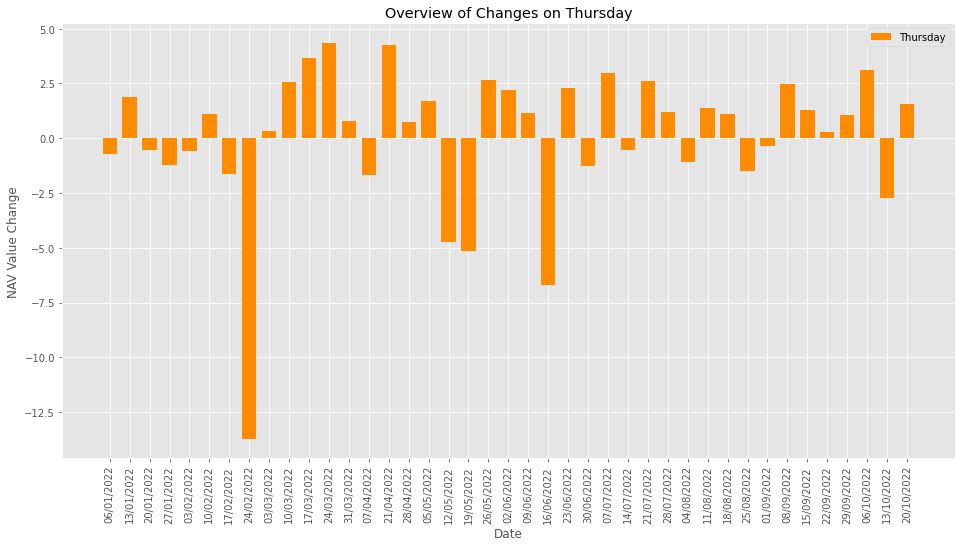

In [158]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=thursday["date"]
y=thursday["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Thursday")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Value Change")
plt.title('Overview of Changes on Thursday')
plt.legend()
plt.show()

In [159]:
thursday.describe()

net_asset_value  nav_change  nav_change_in_percent
count        41.000000   41.000000              41.000000
mean        241.729168    0.111478               0.032439
std          16.208206    3.270202               1.419089
min         213.175000  -13.710000              -6.040000
25%         227.018100   -1.100000              -0.450000
50%         240.907400    1.070000               0.420000
75%         252.418800    2.200000               0.940000
max         276.622700    4.340000               1.860000

In [160]:
thur=round(thursday[('nav_change_in_percent')].mean(), 2)
thur

0.03

#### Friday

In [161]:
friday=quant_working[quant_working.day=='Friday']
friday.head()

date     day  net_asset_value  nav_change  nav_change_in_percent
6   07/01/2022  Friday         241.8924        0.99                   0.24
13  14/01/2022  Friday         251.3135        2.15                   0.86
20  21/01/2022  Friday         241.8434       -3.61                  -1.47
27  28/01/2022  Friday         236.0013        0.91                   0.39
34  04/02/2022  Friday         245.7243        0.03                   0.01

In [162]:
friday.shape

(40, 5)

In [163]:
friday.count()

date                     40
day                      40
net_asset_value          40
nav_change               40
nav_change_in_percent    40
dtype: int64

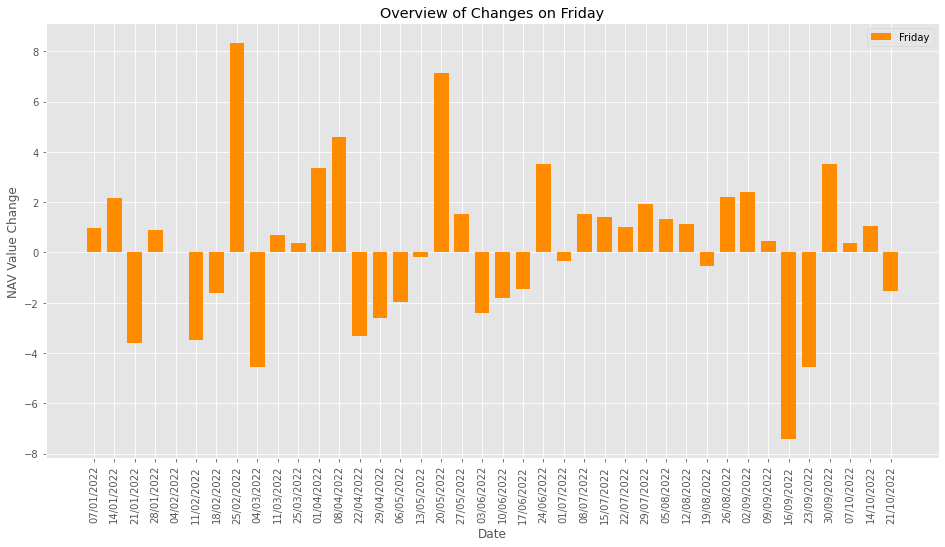

In [164]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=friday["date"]
y=friday["nav_change"]
plt.bar(x,y,color='darkorange',width=0.72,label="Friday")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("NAV Value Change")
plt.title('Overview of Changes on Friday')
plt.legend()
plt.show()

In [165]:
friday.describe()

net_asset_value  nav_change  nav_change_in_percent
count        40.000000   40.000000              40.000000
mean        242.217610    0.262250               0.134000
std          15.578155    3.071501               1.287719
min         214.177500   -7.400000              -2.670000
25%         229.268075   -1.665000              -0.712500
50%         241.932200    0.565000               0.200000
75%         254.692050    1.632500               0.710000
max         269.225100    8.320000               3.900000

In [166]:
fri=round(friday[('nav_change_in_percent')].mean(), 2)
fri

0.13

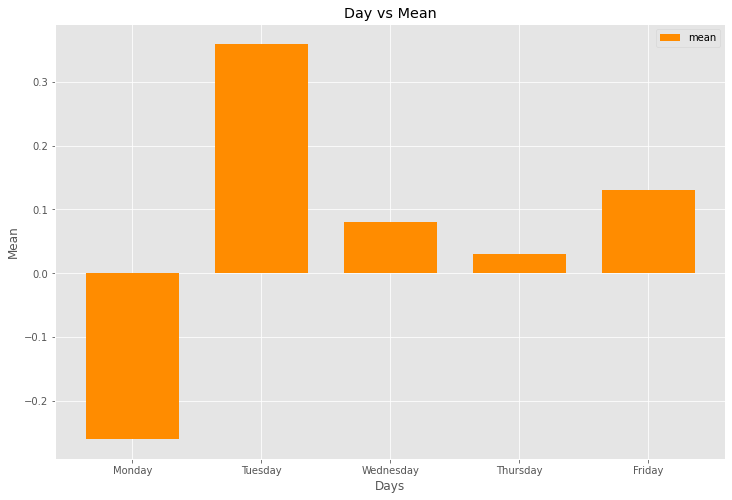

In [167]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [mon,tue,wed,thur,fri]

plt.bar(labels,values,color='darkorange',width=0.72,label="mean")

plt.xlabel("Days")
plt.ylabel("Mean")
plt.title('Day vs Mean')
plt.legend()
plt.show()

### Profit Percentage Probability

#### Monday  Profit %

In [168]:
#quant_minus
monday_plus=len(quant_plus[quant_plus.day=='Monday'])
print(monday_plus)

total_monday=len(quant_working[quant_working.day=='Monday'])
print(total_monday)

21
41


In [169]:
Monday_Profit_Percentage=round((monday_plus/total_monday)*100,2)
Monday_Profit_Percentage

51.22

#### Tuesday  Profit %

In [170]:
tuesday_plus=len(quant_plus[quant_plus.day=='Tuesday'])
print(tuesday_plus)

total_tuesday=len(quant_working[quant_working.day=='Tuesday'])
print(total_tuesday)

25
39


In [171]:
Tuesday_Profit_Percentage=round((tuesday_plus/total_tuesday)*100,2)
Tuesday_Profit_Percentage

64.1

#### Wednesday Profit %

In [172]:
wednesday_plus=len(quant_plus[quant_plus.day=='Wednesday'])
print(wednesday_plus)

total_wednesday=len(quant_working[quant_working.day=='Wednesday'])
print(total_wednesday)

21
38


In [173]:
Wednesday_Profit_Percentage=round((wednesday_plus/total_wednesday)*100,2)
Wednesday_Profit_Percentage

55.26

#### Thursday Profit %

In [174]:
thursday_plus=len(quant_plus[quant_plus.day=='Thursday'])
print(thursday_plus)

total_thursday=len(quant_working[quant_working.day=='Thursday'])
print(total_thursday)

25
41


In [175]:
Thursday_Profit_Percentage=round((thursday_plus/total_thursday)*100,2)
Thursday_Profit_Percentage

60.98

#### Friday Profit %

In [176]:
friday_plus=len(quant_plus[quant_plus.day=='Friday'])
print(friday_plus)

total_friday=len(quant_working[quant_working.day=='Friday'])
print(total_friday)

24
40


In [177]:
Friday_Profit_Percentage=round((friday_plus/total_friday)*100,2)
Friday_Profit_Percentage

60.0

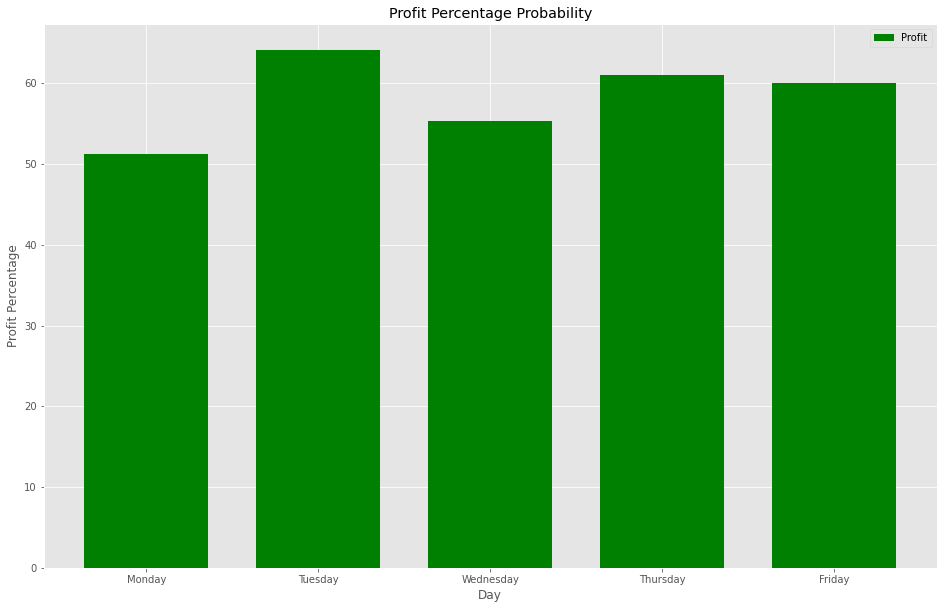

In [178]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,10)

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Profit_Percentage,Tuesday_Profit_Percentage,Wednesday_Profit_Percentage,
          Thursday_Profit_Percentage,Friday_Profit_Percentage]

plt.bar(labels,values,color='green',width=0.72,label="Profit")

plt.xlabel("Day")
plt.ylabel("Profit Percentage")
plt.title('Profit Percentage Probability')
plt.legend()
plt.show()

In [179]:
import plotly.graph_objects as go
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Profit_Percentage,Tuesday_Profit_Percentage,Wednesday_Profit_Percentage,
          Thursday_Profit_Percentage,Friday_Profit_Percentage]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=values,
    width=[0.8, 0.8, 0.8, 0.8, 0.8], # customize width here
    name='Primary Product',
    marker_color='green'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Quant Profit Percentage Probability')
fig.show()

In [180]:
import plotly.graph_objects as go

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Profit_Percentage,Tuesday_Profit_Percentage,Wednesday_Profit_Percentage,
          Thursday_Profit_Percentage,Friday_Profit_Percentage]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Quant Profit Percentage Probability')

fig.show()

### Loss Percentage Probability
#### Monday  Loss %

In [181]:
#axis_minus
monday_minus=len(quant_minus[quant_minus.day=='Monday'])
print(monday_minus)

total_monday=len(quant_working[quant_working.day=='Monday'])
print(total_monday)

20
41


In [182]:
Monday_Loss_Percentage=round((monday_minus/total_monday)*100,2)
Monday_Loss_Percentage

48.78

#### Tuesday  Loss %

In [183]:
tuesday_minus=len(quant_minus[quant_minus.day=='Tuesday'])
print(tuesday_minus)

total_tuesday=len(quant_working[quant_working.day=='Tuesday'])
print(total_tuesday)

14
39


In [184]:
Tuesday_Loss_Percentage=round((tuesday_minus/total_tuesday)*100,2)
Tuesday_Loss_Percentage

35.9

#### Wednesday Loss %

In [185]:
wednesday_minus=len(quant_minus[quant_minus.day=='Wednesday'])
print(wednesday_minus)

total_wednesday=len(quant_working[quant_working.day=='Wednesday'])
print(total_wednesday)

17
38


In [186]:
Wednesday_Loss_Percentage=round((wednesday_minus/total_wednesday)*100,2)
Wednesday_Loss_Percentage

44.74

#### Thursday Loss %

In [187]:
thursday_minus=len(quant_minus[quant_minus.day=='Thursday'])
print(thursday_minus)

total_thursday=len(quant_working[quant_working.day=='Thursday'])
print(total_thursday)

16
41


In [188]:
Thursday_Loss_Percentage=round((thursday_minus/total_thursday)*100,2)
Thursday_Loss_Percentage

39.02

#### Friday Loss %

In [189]:
friday_minus=len(quant_minus[quant_minus.day=='Friday'])
print(friday_minus)

total_friday=len(quant_working[quant_working.day=='Friday'])
print(total_friday)

16
40


In [190]:
Friday_Loss_Percentage=round((friday_minus/total_friday)*100,2)
Friday_Loss_Percentage

40.0

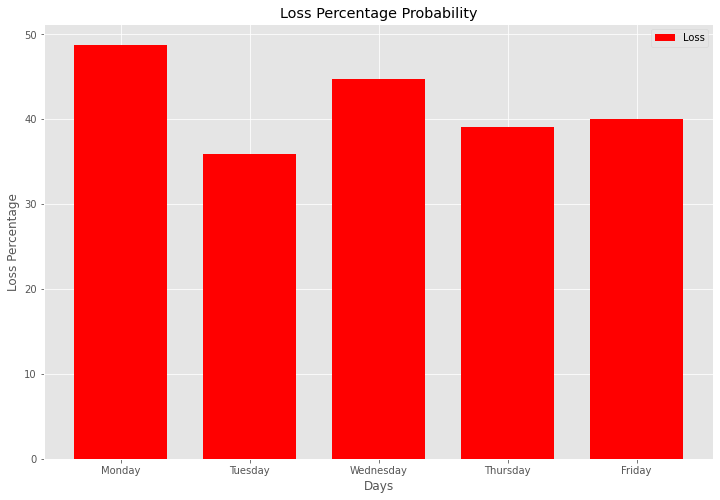

In [191]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Loss_Percentage,Tuesday_Loss_Percentage,Wednesday_Loss_Percentage,
          Thursday_Loss_Percentage,Friday_Loss_Percentage]

plt.bar(labels,values,color='red',width=0.72,label="Loss")

plt.xlabel("Days")
plt.ylabel("Loss Percentage")
plt.title('Loss Percentage Probability')
plt.legend()
plt.show()

In [192]:
import plotly.graph_objects as go
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Loss_Percentage,Tuesday_Loss_Percentage,Wednesday_Loss_Percentage,
          Thursday_Loss_Percentage,Friday_Loss_Percentage]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=values,
    width=[0.8, 0.8, 0.8, 0.8, 0.8], # customize width here
    name='Primary Product',
    marker_color='red'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Quant Loss Percentage Probability')
fig.show()

In [193]:
import plotly.graph_objects as go

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Loss_Percentage,Tuesday_Loss_Percentage,Wednesday_Loss_Percentage,
          Thursday_Loss_Percentage,Friday_Loss_Percentage]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Quant Loss Percentage Probability')

fig.show()

In [194]:
import plotly.graph_objects as go

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
profit_values = [Monday_Profit_Percentage,Tuesday_Profit_Percentage,Wednesday_Profit_Percentage,
          Thursday_Profit_Percentage,Friday_Profit_Percentage]
loss_values = [Monday_Loss_Percentage,Tuesday_Loss_Percentage,Wednesday_Loss_Percentage,
          Thursday_Loss_Percentage,Friday_Loss_Percentage]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=profit_values,
    name='Profit',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=labels,
    y=loss_values,
    name='Loss',
    marker_color='red'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Day Wise Performance of Quant')

fig.show()
